<a href="https://colab.research.google.com/github/bhagya8x21/16352437_DeepLearning_Project1/blob/main/16352437_DEEPLEARNING_PROJECT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Neural network identifying patterns within data.**


# Creating a neural network

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statistics import mean
from typing import Dict, List, Tuple

np.random.seed(2437)

class Neural:

    def __init__(self, layers: List[int], epochs: int,
                 learning_rate: float, batch_size: int,
                 validation_split: float, verbose: int=1):
        self._layer_structure: List[int] = layers
        self._batch_size: int = batch_size
        self._epochs: int = epochs
        self._learning_rate: float = learning_rate
        self._validation_split: float = validation_split
        self._verbose: int = verbose
        self._losses: Dict[str, float] = {"train": [], "validation": []}
        self._is_fit: bool = False
        self.__layers = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # validation split
        X, X_val, y, y_val = train_test_split(X, y, test_size=self._validation_split, random_state=42)
        # initialization of layers
        self.__layers = self.__init_layers()
        for epoch in range(self._epochs):
            epoch_losses = []
            for i in range(1, len(self.__layers)):
                # forward pass
                x_batch = X[i:(i+self._batch_size)]
                y_batch = y[i:(i+self._batch_size)]
                pred, hidden = self.__forward(x_batch)
                # calculate loss
                loss = self.__calculate_loss(y_batch, pred)
                epoch_losses.append(np.mean(loss ** 2))
                #backward
                self.__backward(hidden, loss)
            valid_preds, _ = self.__forward(X_val)
            train_loss = mean(epoch_losses)
            valid_loss = np.mean(self.__calculate_mse(valid_preds,y_val))
            self._losses["train"].append(train_loss)
            self._losses["validation"].append(valid_loss)
            if self._verbose:
                print(f"Epoch: {epoch} Train MSE: {train_loss} Valid MSE: {valid_loss}")
        self._is_fit = True
        return

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self._is_fit == False:
            raise Exception("Model has not been trained yet.")
        pred, hidden = self.__forward(X)
        return pred

    def plot_learning(self) -> None:
        plt.plot(self._losses["train"],label="loss")
        plt.plot(self._losses["validation"],label="validation")
        plt.legend()

    def __init_layers(self) -> List[np.ndarray]:
        layers = []
        for i in range(1, len(self._layer_structure)):
            layers.append([
                np.random.rand(self._layer_structure[i-1], self._layer_structure[i]) / 5 - .1,
                np.ones((1,self._layer_structure[i]))
            ])
        return layers

    def __forward(self, batch: np.ndarray) -> Tuple[np.ndarray, List[np.ndarray]]:
        hidden = [batch.copy()]
        for i in range(len(self.__layers)):
            batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]
            if i < len(self.__layers) - 1:
                batch = np.maximum(batch, 0)
            # Store the forward pass hidden values for use in backprop
            hidden.append(batch.copy())
        return batch, hidden

    def __calculate_loss(self,actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        "mse"
        return predicted - actual


    def __calculate_mse(self, actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        return (actual - predicted) ** 2

    def __backward(self, hidden: List[np.ndarray], grad: np.ndarray) -> None:
        for i in range(len(self.__layers)-1, -1, -1):
            if i != len(self.__layers) - 1:
                grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

            w_grad = hidden[i].T @ grad
            b_grad = np.mean(grad, axis=0)

            self.__layers[i][0] -= w_grad * self._learning_rate
            self.__layers[i][1] -= b_grad * self._learning_rate

            grad = grad @ self.__layers[i][0].T
        return

# Incorporating a custom dataset provided by the user and performing data preprocessing tailored to the specifications of the neural network model.

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Assume 'df' is your DataFrame with categorical variables
# Let's say 'categorical_columns' is a list of columns containing categorical data

label_encoder = LabelEncoder()


# Load your dataset
df = pd.read_csv('/content/data.csv')

# Data has been prepared for preprocessing and is now prepared to be fed into the model for fitting.

In [189]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [190]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

df = df.drop('id',axis=1)
df =  df.drop('Unnamed: 32',axis=1)

In [191]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

# Training the model using the processed dataset imported earlier.

# Performing feature extraction by conducting correlation analysis with respect to the target variable.

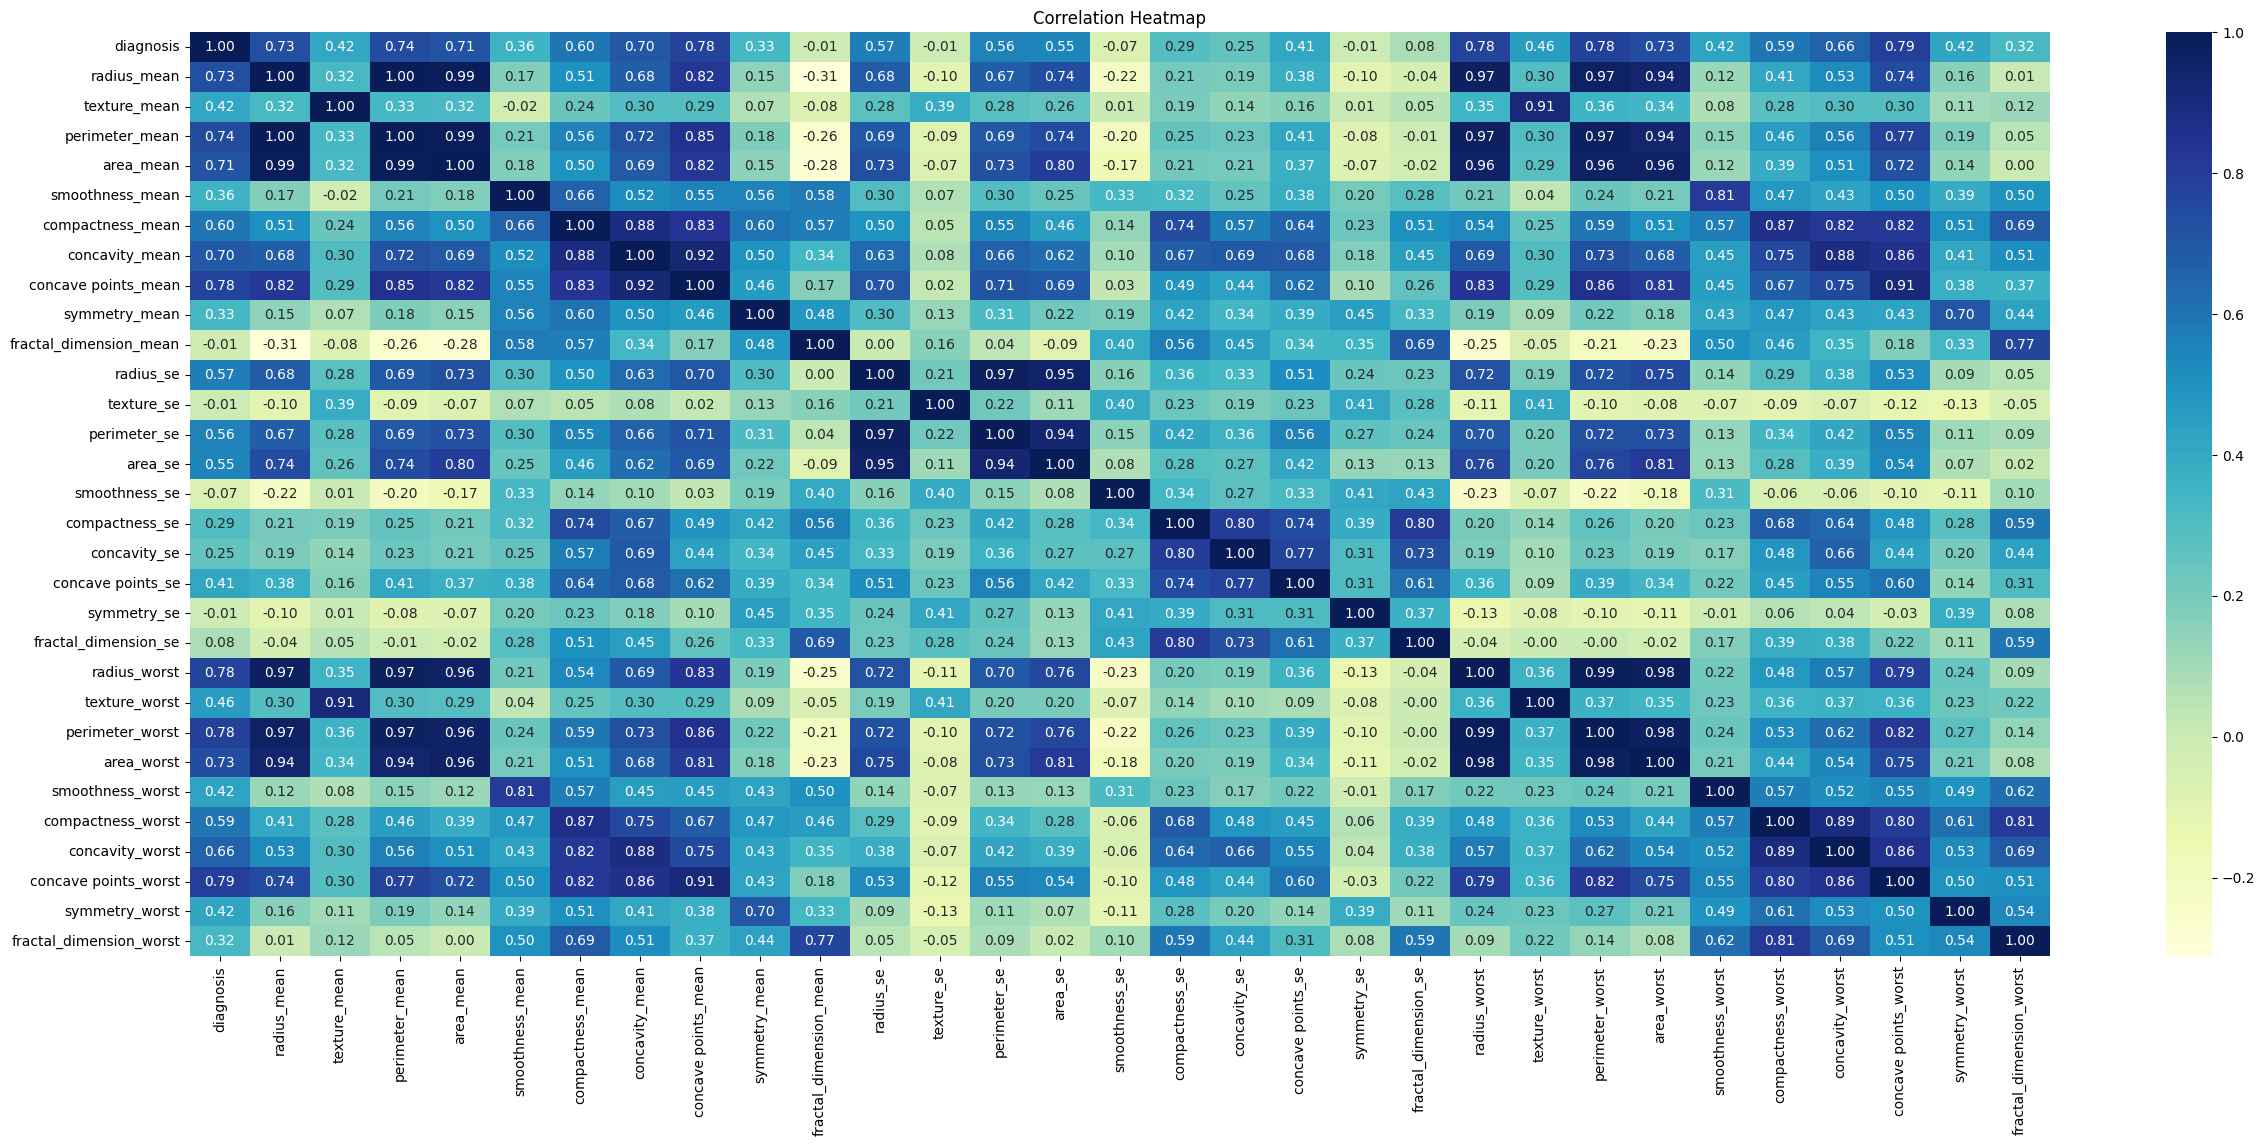

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(30, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Conducting feature selection to prepare the dataset for model fitting.

In [173]:
# Split the features and target
X = df[['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_worst','perimeter_worst','radius_worst','concave points_mean']]
y = df['diagnosis']

In [174]:
X

radius_mean  perimeter_mean  area_mean  compactness_mean  \
0          17.99          122.80     1001.0           0.27760   
1          20.57          132.90     1326.0           0.07864   
2          19.69          130.00     1203.0           0.15990   
3          11.42           77.58      386.1           0.28390   
4          20.29          135.10     1297.0           0.13280   
..           ...             ...        ...               ...   
564        21.56          142.00     1479.0           0.11590   
565        20.13          131.20     1261.0           0.10340   
566        16.60          108.30      858.1           0.10230   
567        20.60          140.10     1265.0           0.27700   
568         7.76           47.92      181.0           0.04362   

     concave points_worst  perimeter_worst  radius_worst  concave points_mean  
0                  0.2654           184.60        25.380              0.14710  
1                  0.1860           158.80        24.990              0.07017  
2                  0.2430           152.50        23.570              0.12790  
3                  0.2575            98.87        14.910              0.10520  
4                  0.1625           152.20        22.540              0.10430  
..                    ...              ...           ...                  ...  
564                0.2216           166.10        25.450              0.13890  
565                0.1628           155.00        23.690              0.09791  
566                0.1418           126.70        18.980              0.05302  
567                0.2650           184.60        25.740              0.15200  
568                0.0000            59.16         9.456              0.00000  

[569 rows x 8 columns]

In [175]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Training the neural network model on the selected features with respect to the target variable and refining the hyperparameters to optimize the model configuration.

 # Configuration 1
    {"layers": [X_train.shape[1], 2,1], "epochs": 200, "learning_rate": 0.01, "batch_size": 32, "validation_split": 0.2},
# Configuration 2
    {"layers": [X_train.shape[1],2,1], "epochs": 300, "learning_rate": 0.001, "batch_size": 128, "validation_split": 0.2}

Epoch: 0 Train MSE: 0.5770250396698096 Valid MSE: 0.20999098998051166
Epoch: 1 Train MSE: 0.20238710600949045 Valid MSE: 0.10812418603478674
Epoch: 2 Train MSE: 0.06855157915849881 Valid MSE: 0.09236307572633722
Epoch: 3 Train MSE: 0.04469972365536593 Valid MSE: 0.0888988150013515
Epoch: 4 Train MSE: 0.04088725887000911 Valid MSE: 0.08603157907313494
Epoch: 5 Train MSE: 0.038744855209891196 Valid MSE: 0.08397054070749234
Epoch: 6 Train MSE: 0.037295598466032115 Valid MSE: 0.08251440498030779
Epoch: 7 Train MSE: 0.03626130016036272 Valid MSE: 0.08145847183235477
Epoch: 8 Train MSE: 0.0354837621766174 Valid MSE: 0.08067635486031871
Epoch: 9 Train MSE: 0.03488825054508056 Valid MSE: 0.08010297819086937
Epoch: 10 Train MSE: 0.034439716466124426 Valid MSE: 0.07967017490931817
Epoch: 11 Train MSE: 0.034132257583074845 Valid MSE: 0.07935926766560358
Epoch: 12 Train MSE: 0.03386782827887123 Valid MSE: 0.07910779910316257
Epoch: 13 Train MSE: 0.03363828380093047 Valid MSE: 0.07890286806628406
E

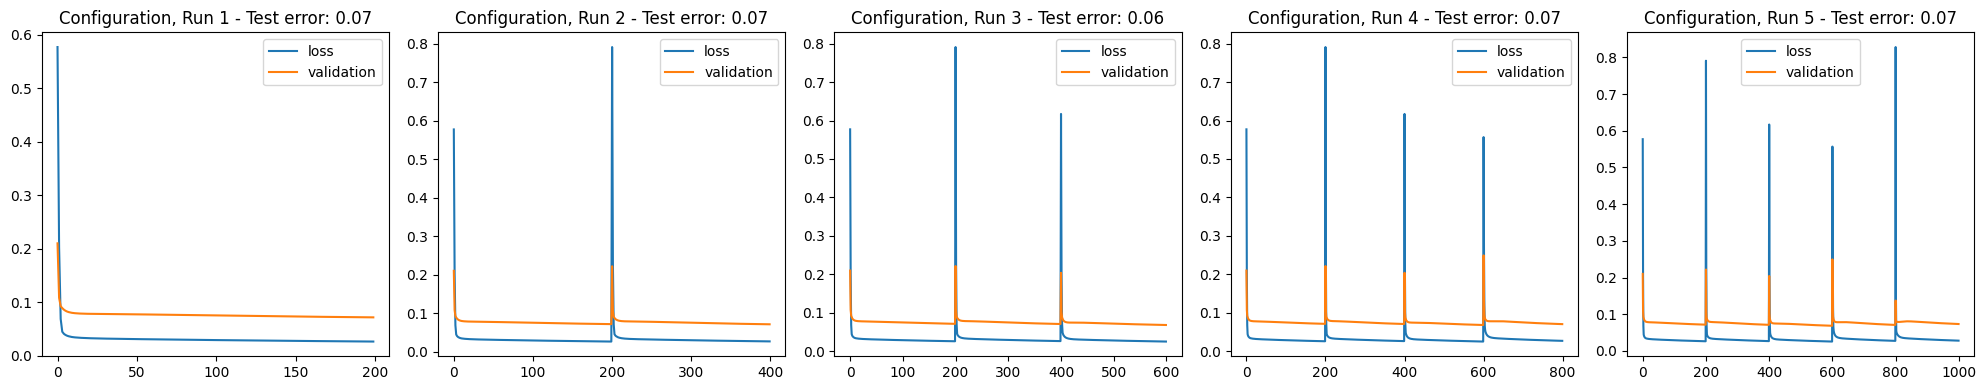

Epoch: 0 Train MSE: 0.6405679253547703 Valid MSE: 0.4223319732937542
Epoch: 1 Train MSE: 0.4563989193443705 Valid MSE: 0.31915191143934407
Epoch: 2 Train MSE: 0.34056346681392563 Valid MSE: 0.24801988319590845
Epoch: 3 Train MSE: 0.2605651228342094 Valid MSE: 0.1958407871429276
Epoch: 4 Train MSE: 0.2028002186762659 Valid MSE: 0.1579506558126834
Epoch: 5 Train MSE: 0.16180667558771017 Valid MSE: 0.13137669257726461
Epoch: 6 Train MSE: 0.13346934631357596 Valid MSE: 0.11340537796565192
Epoch: 7 Train MSE: 0.11464720651307689 Valid MSE: 0.10169143486811118
Epoch: 8 Train MSE: 0.10250782283594151 Valid MSE: 0.09408277695943491
Epoch: 9 Train MSE: 0.09452164208422582 Valid MSE: 0.089156453028701
Epoch: 10 Train MSE: 0.08909715500618043 Valid MSE: 0.08578206255681006
Epoch: 11 Train MSE: 0.08521362652207519 Valid MSE: 0.08334808118555559
Epoch: 12 Train MSE: 0.08229821712385299 Valid MSE: 0.08152237046008787
Epoch: 13 Train MSE: 0.07995172797612787 Valid MSE: 0.08010001535117342
Epoch: 14 T

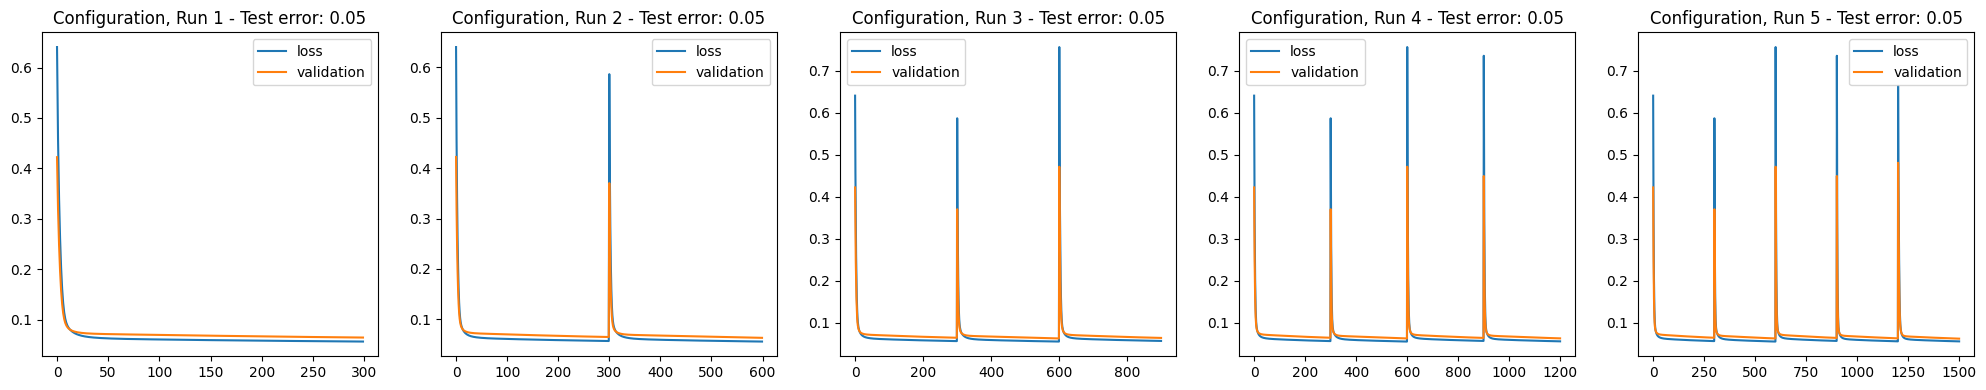

In [176]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
configurations_list = [
    # Configuration 1
    {"layers": [X_train.shape[1], 2,1], "epochs": 200, "learning_rate": 0.01, "batch_size": 32, "validation_split": 0.2},
    # Configuration 2
    {"layers": [X_train.shape[1],2,1], "epochs": 300, "learning_rate": 0.001, "batch_size": 128, "validation_split": 0.2}
]
# Run the model multiple times with each configuration
i1=2
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        if np.isnan(y_pred).any():
            print("NaN values found in predictions. Skipping this run.")
            continue
        valid_indices = ~np.isnan(y_test).flatten()
        y_test_valid = y_test[valid_indices]
        y_pred_valid = y_pred[valid_indices]

    # Calculate test error

        test_error = mean_squared_error(y_test_valid, y_pred_valid)
        plt.title(f"Configuration, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()


# Configuration 3
    {"layers": [X_train.shape[1], 64, 32, 16, 8, 1], "epochs": 150, "learning_rate": 0.0001, "batch_size": 256, "validation_split": 0.2},
# Configuration 4
    {"layers": [X_train.shape[1], 16, 8, 1], "epochs": 100, "learning_rate": 0.001, "batch_size": 64, "validation_split": 0.3}

Epoch: 0 Train MSE: 0.3790429657350478 Valid MSE: 0.27851577486793616
Epoch: 1 Train MSE: 0.26098912015678005 Valid MSE: 0.24348981551982712
Epoch: 2 Train MSE: 0.24049246474826091 Valid MSE: 0.23866313907057338
Epoch: 3 Train MSE: 0.2375551159884432 Valid MSE: 0.23806948236834877
Epoch: 4 Train MSE: 0.23709149327744516 Valid MSE: 0.23793584912519572
Epoch: 5 Train MSE: 0.2369350494238978 Valid MSE: 0.23782999967197796
Epoch: 6 Train MSE: 0.23681419781997137 Valid MSE: 0.2377174738390277
Epoch: 7 Train MSE: 0.2366965787699944 Valid MSE: 0.237600099584311
Epoch: 8 Train MSE: 0.23657833097559472 Valid MSE: 0.23748002486342523
Epoch: 9 Train MSE: 0.23645892059669923 Valid MSE: 0.23735809750712544
Epoch: 10 Train MSE: 0.2363381992552805 Valid MSE: 0.23723455965327792
Epoch: 11 Train MSE: 0.23621606179130636 Valid MSE: 0.23710942751532652
Epoch: 12 Train MSE: 0.2360924060910071 Valid MSE: 0.2369826367138149
Epoch: 13 Train MSE: 0.2359671281156733 Valid MSE: 0.23685409334176039
Epoch: 14 Tra

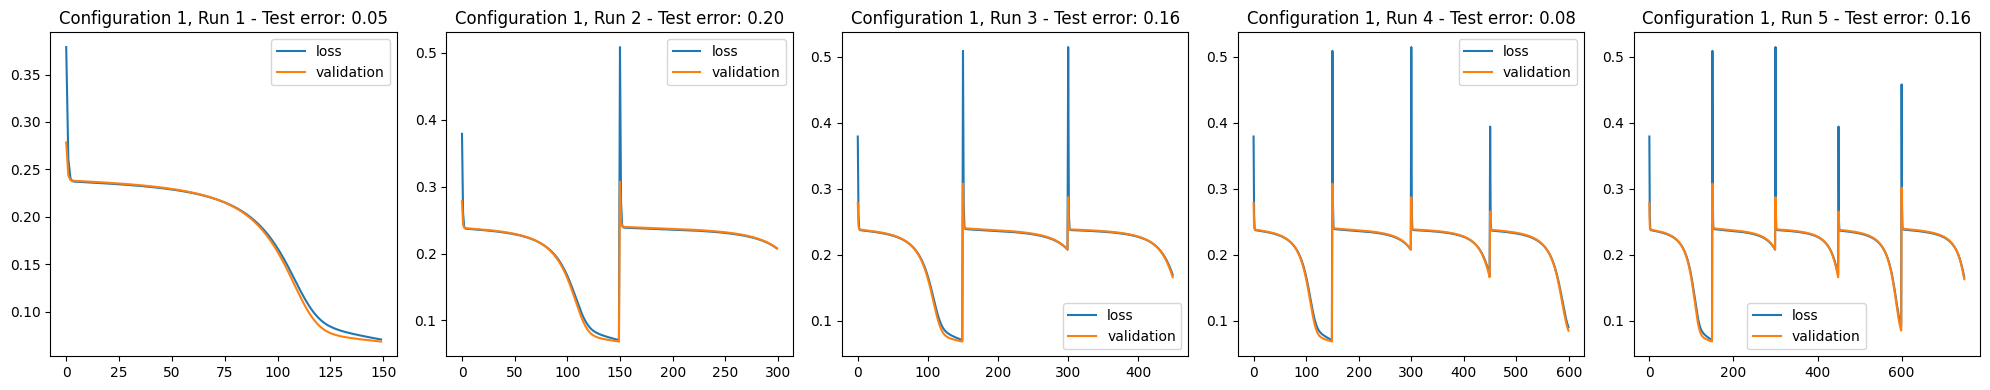

Epoch: 0 Train MSE: 0.529927618392509 Valid MSE: 0.2989890385652595
Epoch: 1 Train MSE: 0.2716983496877941 Valid MSE: 0.24190082890059786
Epoch: 2 Train MSE: 0.2443457115851171 Valid MSE: 0.23328300728826407
Epoch: 3 Train MSE: 0.24095453578313042 Valid MSE: 0.2303101182026931
Epoch: 4 Train MSE: 0.23919004338666183 Valid MSE: 0.22821879416423846
Epoch: 5 Train MSE: 0.23752037640672796 Valid MSE: 0.22629903663190726
Epoch: 6 Train MSE: 0.23584894516640312 Valid MSE: 0.2244032853374901
Epoch: 7 Train MSE: 0.23416141988498895 Valid MSE: 0.22249156599561123
Epoch: 8 Train MSE: 0.23244868756942988 Valid MSE: 0.2205482982123463
Epoch: 9 Train MSE: 0.23070410692763527 Valid MSE: 0.21856315987035282
Epoch: 10 Train MSE: 0.22891784635147033 Valid MSE: 0.21652532541754396
Epoch: 11 Train MSE: 0.22708055260335105 Valid MSE: 0.21442486627962284
Epoch: 12 Train MSE: 0.2251831124989544 Valid MSE: 0.21225176970509857
Epoch: 13 Train MSE: 0.22321615929182226 Valid MSE: 0.20999579176596544
Epoch: 14 T

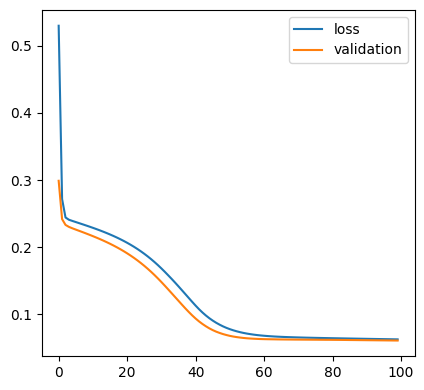

In [177]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume Neural class is defined elsewhere

# Function to calculate percentage error
def percentage_error(true, pred):
    return np.abs(true - pred) / (np.max(true) - np.min(true)) * 100

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)
configurations_list = [
   # Configuration 3
    {"layers": [X_train.shape[1], 64, 32, 16, 8, 1], "epochs": 150, "learning_rate": 0.0001, "batch_size": 256, "validation_split": 0.2},
    # Configuration 4
    {"layers": [X_train.shape[1], 16, 8, 1], "epochs": 100, "learning_rate": 0.001, "batch_size": 64, "validation_split": 0.3}
]

# Run the model multiple times with each configuration
i1 = 2
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i + 1)
        nn.plot_learning()

        if np.isnan(y_pred).any():
            print("NaN values found in predictions. Skipping this run.")
            continue
        valid_indices = ~np.isnan(y_test).flatten()
        y_test_valid = y_test[valid_indices]
        y_pred_valid = y_pred[valid_indices]

        # Calculate test error
        test_error = mean_squared_error(y_test_valid, y_pred_valid)

        # Calculate the acceptable threshold for the test error
        threshold = 0.05 * (np.max(y_train) - np.min(y_train))

        # Check if test error is less than or equal to 5%
        if test_error <= threshold:
            print(f"Configuration {idx+1}, Run {i+1}: Test error <= 5% threshold")
            break

        plt.title(f"Configuration {idx+1}, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()

# I increased the learning rate to potentially accelerate the model's learning process and enhance its performance.

# Configuration 5
    {"layers": [X_train.shape[1], 2,1], "epochs": 200, "learning_rate": 0.001, "batch_size": 32, "validation_split": 0.2},
# Configuration 6
    {"layers": [X_train.shape[1],2,1], "epochs": 450, "learning_rate": 0.001, "batch_size": 128, "validation_split": 0.2}

Epoch: 0 Train MSE: 0.5429580261996201 Valid MSE: 0.4321696934029447
Epoch: 1 Train MSE: 0.4912670390520324 Valid MSE: 0.392718840040167
Epoch: 2 Train MSE: 0.4454817841304456 Valid MSE: 0.3579054883251758
Epoch: 3 Train MSE: 0.4047591967926234 Valid MSE: 0.32706057090935586
Epoch: 4 Train MSE: 0.3683959071466003 Valid MSE: 0.2996331230117187
Epoch: 5 Train MSE: 0.33580597300696846 Valid MSE: 0.27517471435323526
Epoch: 6 Train MSE: 0.3065020223470773 Valid MSE: 0.25331044943132175
Epoch: 7 Train MSE: 0.2800790905766561 Valid MSE: 0.23371188696475315
Epoch: 8 Train MSE: 0.25620067174570604 Valid MSE: 0.21611594329163772
Epoch: 9 Train MSE: 0.23458665564734632 Valid MSE: 0.2003033399221001
Epoch: 10 Train MSE: 0.21500292124842824 Valid MSE: 0.1860901085408813
Epoch: 11 Train MSE: 0.1972524181543858 Valid MSE: 0.1733203994005779
Epoch: 12 Train MSE: 0.18116760350694755 Valid MSE: 0.1618604811834327
Epoch: 13 Train MSE: 0.16660411993804736 Valid MSE: 0.15159382577558633
Epoch: 14 Train MSE

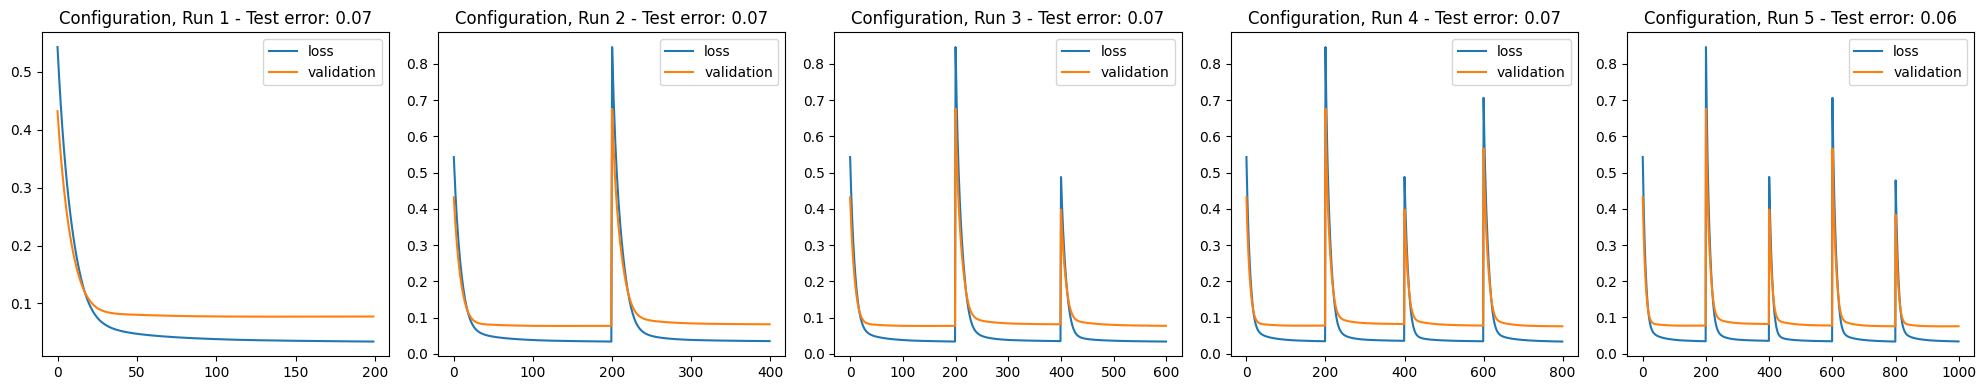

Epoch: 0 Train MSE: 0.6762023955532848 Valid MSE: 0.4394902804332529
Epoch: 1 Train MSE: 0.4744978175492178 Valid MSE: 0.3276078956858349
Epoch: 2 Train MSE: 0.34784954090789 Valid MSE: 0.25115253047158376
Epoch: 3 Train MSE: 0.26066892707277217 Valid MSE: 0.19547476660912053
Epoch: 4 Train MSE: 0.19820372248217905 Valid MSE: 0.15552163066985697
Epoch: 5 Train MSE: 0.15427625162786057 Valid MSE: 0.1276159843254039
Epoch: 6 Train MSE: 0.12444016502836078 Valid MSE: 0.10904746282350741
Epoch: 7 Train MSE: 0.10525962666777282 Valid MSE: 0.09728543460742327
Epoch: 8 Train MSE: 0.09327063514945447 Valid MSE: 0.08978652417300904
Epoch: 9 Train MSE: 0.08572042453109843 Valid MSE: 0.08494744853255862
Epoch: 10 Train MSE: 0.0808326811864218 Valid MSE: 0.08171227723561475
Epoch: 11 Train MSE: 0.0774558342076557 Valid MSE: 0.07955442618805131
Epoch: 12 Train MSE: 0.07505308136256486 Valid MSE: 0.07795886803544878
Epoch: 13 Train MSE: 0.07317332347383845 Valid MSE: 0.07671226252977972
Epoch: 14 Tr

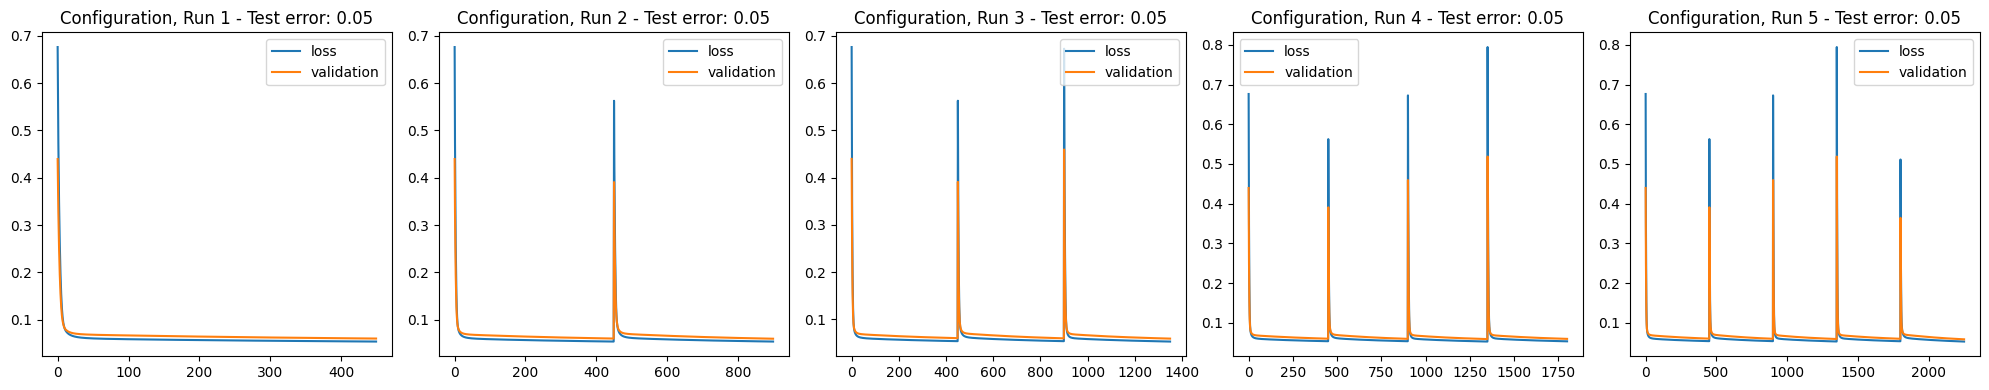

In [178]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
configurations_list = [
    # Configuration 5
    {"layers": [X_train.shape[1], 2,1], "epochs": 200, "learning_rate": 0.001, "batch_size": 32, "validation_split": 0.2},
    # Configuration 6
    {"layers": [X_train.shape[1],2,1], "epochs": 450, "learning_rate": 0.001, "batch_size": 128, "validation_split": 0.2}
]
# Run the model multiple times with each configuration
i1=2
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        if np.isnan(y_pred).any():
            print("NaN values found in predictions. Skipping this run.")
            continue
        valid_indices = ~np.isnan(y_test).flatten()
        y_test_valid = y_test[valid_indices]
        y_pred_valid = y_pred[valid_indices]

    # Calculate test error

        test_error = mean_squared_error(y_test_valid, y_pred_valid)
        plt.title(f"Configuration, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()


Configuration 7 and 8: I augmented the batch size to potentially improve the model's convergence by providing more data points in each iteration.
 # Configuration 7
  {"layers": [X_train.shape[1], 2, 1], "epochs": 100, "learning_rate": 0.001, "batch_size": 70, "validation_split": 0.2},
# Configuration 8
   {"layers": [X_train.shape[1], 2, 1], "epochs": 250, "learning_rate": 0.001, "batch_size": 120, "validation_split": 0.2}

Epoch: 0 Train MSE: 0.5472360100585205 Valid MSE: 0.4162436402556165
Epoch: 1 Train MSE: 0.4734619849573181 Valid MSE: 0.3688023747301486
Epoch: 2 Train MSE: 0.41214908132093336 Valid MSE: 0.3287010020301191
Epoch: 3 Train MSE: 0.3591169949610024 Valid MSE: 0.2934098039593236
Epoch: 4 Train MSE: 0.31192329563091403 Valid MSE: 0.26160500370051354
Epoch: 5 Train MSE: 0.269353740508093 Valid MSE: 0.23276881443185737
Epoch: 6 Train MSE: 0.23099946877384925 Valid MSE: 0.20685683957390633
Epoch: 7 Train MSE: 0.19690019481815885 Valid MSE: 0.1840271327227888
Epoch: 8 Train MSE: 0.16743739172546546 Valid MSE: 0.16464763857696016
Epoch: 9 Train MSE: 0.14276390250227192 Valid MSE: 0.14881867174155242
Epoch: 10 Train MSE: 0.1226277090762447 Valid MSE: 0.13577474032689893
Epoch: 11 Train MSE: 0.10643384786018444 Valid MSE: 0.12534959412184843
Epoch: 12 Train MSE: 0.09375307907245041 Valid MSE: 0.1170153566250465
Epoch: 13 Train MSE: 0.0838343429080815 Valid MSE: 0.1104115319760868
Epoch: 14 Train 

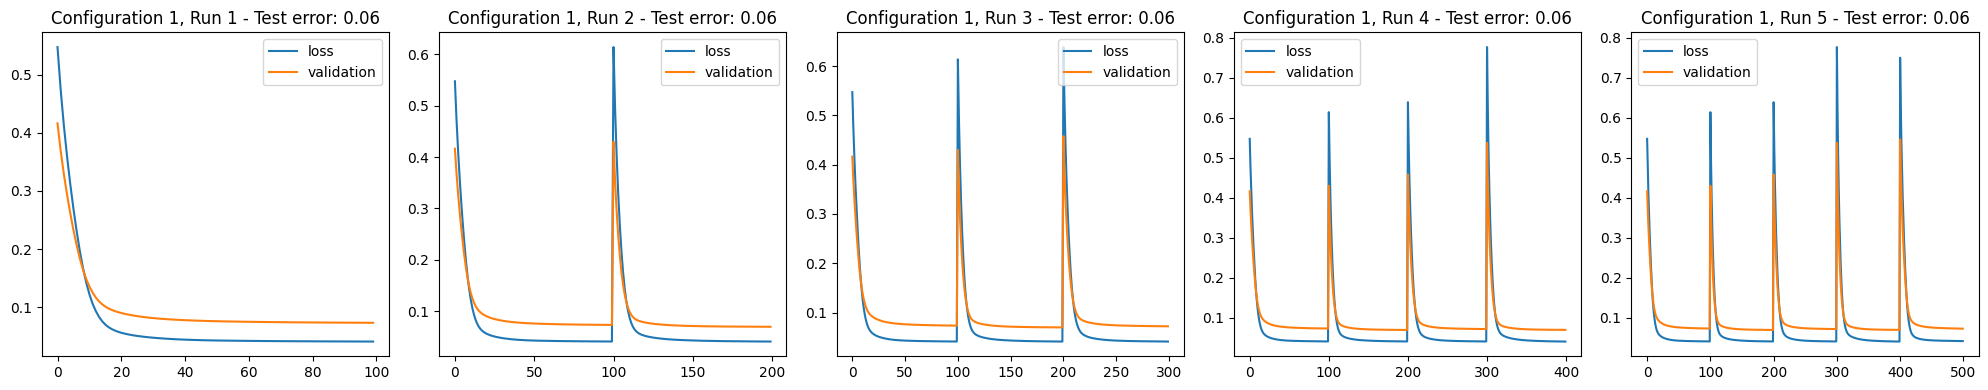

Epoch: 0 Train MSE: 0.5505829180322888 Valid MSE: 0.4011549475647727
Epoch: 1 Train MSE: 0.4276692717663367 Valid MSE: 0.3253796193289011
Epoch: 2 Train MSE: 0.34241045109656654 Valid MSE: 0.26718080612700007
Epoch: 3 Train MSE: 0.27692462334395057 Valid MSE: 0.21932733298314067
Epoch: 4 Train MSE: 0.22390642807333982 Valid MSE: 0.1798680272033625
Epoch: 5 Train MSE: 0.1811015224531854 Valid MSE: 0.14873538296709415
Epoch: 6 Train MSE: 0.1479394515826695 Valid MSE: 0.12573098190975815
Epoch: 7 Train MSE: 0.12386897336275655 Valid MSE: 0.10945754309570793
Epoch: 8 Train MSE: 0.10717817351090857 Valid MSE: 0.09824885368085773
Epoch: 9 Train MSE: 0.09586328963823018 Valid MSE: 0.09072290379898644
Epoch: 10 Train MSE: 0.08825533421723933 Valid MSE: 0.08566696932857777
Epoch: 11 Train MSE: 0.08300397699715376 Valid MSE: 0.0822637281651449
Epoch: 12 Train MSE: 0.07927727250232773 Valid MSE: 0.07986894739214434
Epoch: 13 Train MSE: 0.07649565270518238 Valid MSE: 0.07811619560010646
Epoch: 14 

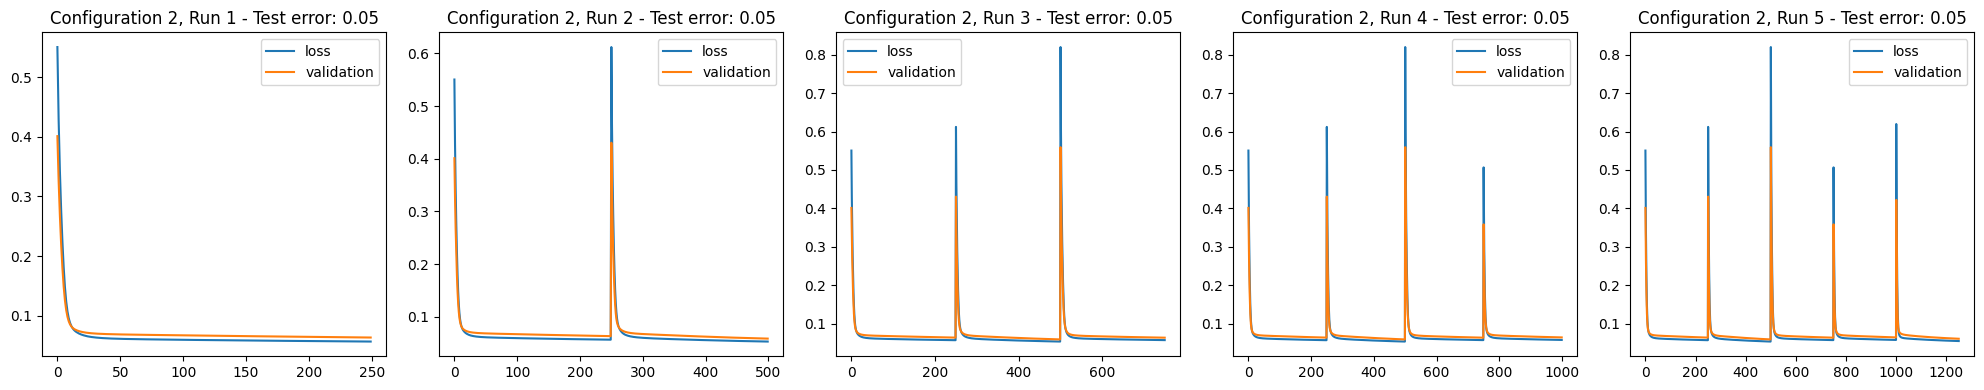

In [179]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

configurations_list = [
    # Configuration 7
    {"layers": [X_train.shape[1], 2, 1], "epochs": 100, "learning_rate": 0.001, "batch_size": 70, "validation_split": 0.2},
    # Configuration 8
    {"layers": [X_train.shape[1], 2, 1], "epochs": 250, "learning_rate": 0.001, "batch_size": 120, "validation_split": 0.2}
]
# Run the model multiple times with each configuration
# Run the model multiple times with each configuration
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        # Print test error
        test_error = mean_squared_error(y_test, y_pred)
        plt.title(f"Configuration {idx+1}, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()

# I expanded the feature set by incorporating additional features into the model.
# Configuration 9
    {"layers": [X_train.shape[1], 3, 1], "epochs": 90, "learning_rate": 0.001, "batch_size": 128, "validation_split": 0.2},
# Configuration 10
    {"layers": [X_train.shape[1], 2, 1], "epochs": 90, "learning_rate": 0.001, "batch_size": 256, "validation_split": 0.2}

In [180]:
# Separate the features and target
X = df[['radius_mean','perimeter_mean','radius_se','perimeter_se','area_mean','compactness_mean','concave points_worst','area_worst','perimeter_worst','radius_worst','concave points_mean']]
y = df['diagnosis']

Epoch: 0 Train MSE: 0.7000957867484574 Valid MSE: 0.38122547812184365
Epoch: 1 Train MSE: 0.40957029414701435 Valid MSE: 0.26665216816407006
Epoch: 2 Train MSE: 0.27771521434539975 Valid MSE: 0.20566394698216175
Epoch: 3 Train MSE: 0.20779094728101835 Valid MSE: 0.16782733278686104
Epoch: 4 Train MSE: 0.16671573576675877 Valid MSE: 0.1428262416814401
Epoch: 5 Train MSE: 0.1413272574847002 Valid MSE: 0.12568834004437898
Epoch: 6 Train MSE: 0.12496301677092922 Valid MSE: 0.11336751455926239
Epoch: 7 Train MSE: 0.11378016712777225 Valid MSE: 0.1043288221223256
Epoch: 8 Train MSE: 0.10575841920807803 Valid MSE: 0.09755135123038235
Epoch: 9 Train MSE: 0.09966014433783574 Valid MSE: 0.09249355539417095
Epoch: 10 Train MSE: 0.0948164555319797 Valid MSE: 0.08848149904620689
Epoch: 11 Train MSE: 0.09083083378786748 Valid MSE: 0.08538845204253885
Epoch: 12 Train MSE: 0.08754429467518927 Valid MSE: 0.0829702742699919
Epoch: 13 Train MSE: 0.08480429436220124 Valid MSE: 0.08102145373846914
Epoch: 1

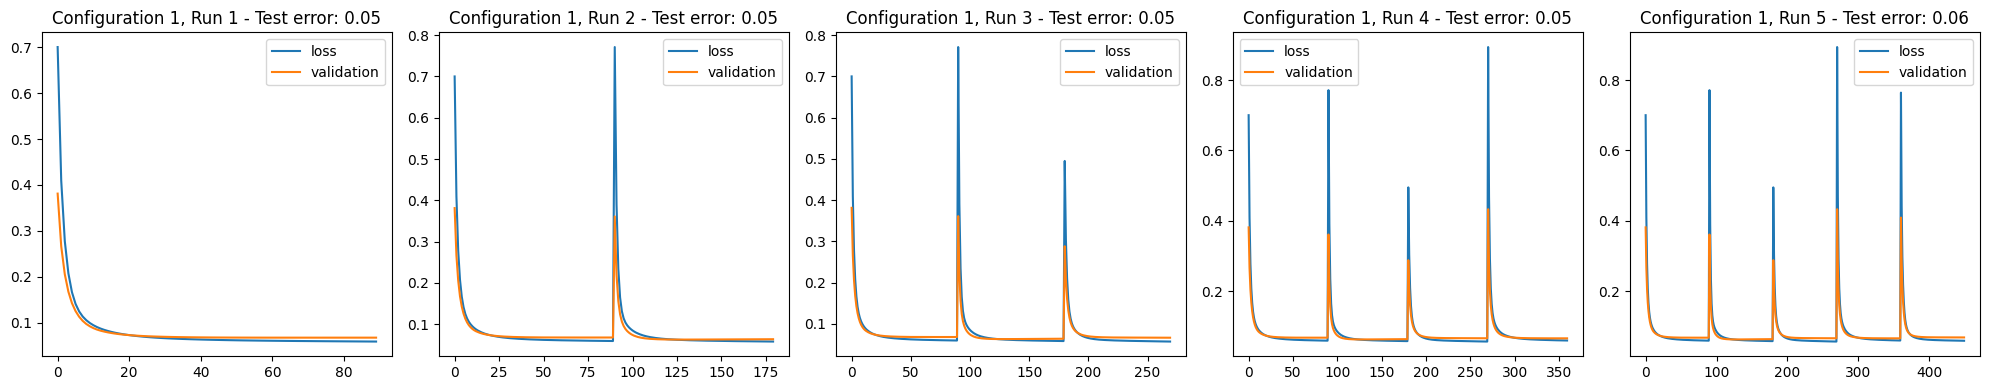

Epoch: 0 Train MSE: 0.4600145862308841 Valid MSE: 0.20490902099492883
Epoch: 1 Train MSE: 0.2018876961983669 Valid MSE: 0.10830106503784048
Epoch: 2 Train MSE: 0.10777433042355505 Valid MSE: 0.0808163338940269
Epoch: 3 Train MSE: 0.08300352209884942 Valid MSE: 0.07419144336338893
Epoch: 4 Train MSE: 0.07714804613937021 Valid MSE: 0.07164676259710195
Epoch: 5 Train MSE: 0.07452510263921529 Valid MSE: 0.07008845425458575
Epoch: 6 Train MSE: 0.0727082397840777 Valid MSE: 0.06896808194607566
Epoch: 7 Train MSE: 0.07132212722738068 Valid MSE: 0.06813078654914799
Epoch: 8 Train MSE: 0.07023276979336965 Valid MSE: 0.06747753585165807
Epoch: 9 Train MSE: 0.06934845824762897 Valid MSE: 0.06696930563828775
Epoch: 10 Train MSE: 0.06861841650292004 Valid MSE: 0.06654578313194995
Epoch: 11 Train MSE: 0.06800568138002308 Valid MSE: 0.06619711479190087
Epoch: 12 Train MSE: 0.067497197396649 Valid MSE: 0.06590018706816148
Epoch: 13 Train MSE: 0.06706444125236954 Valid MSE: 0.06565168008383851
Epoch: 1

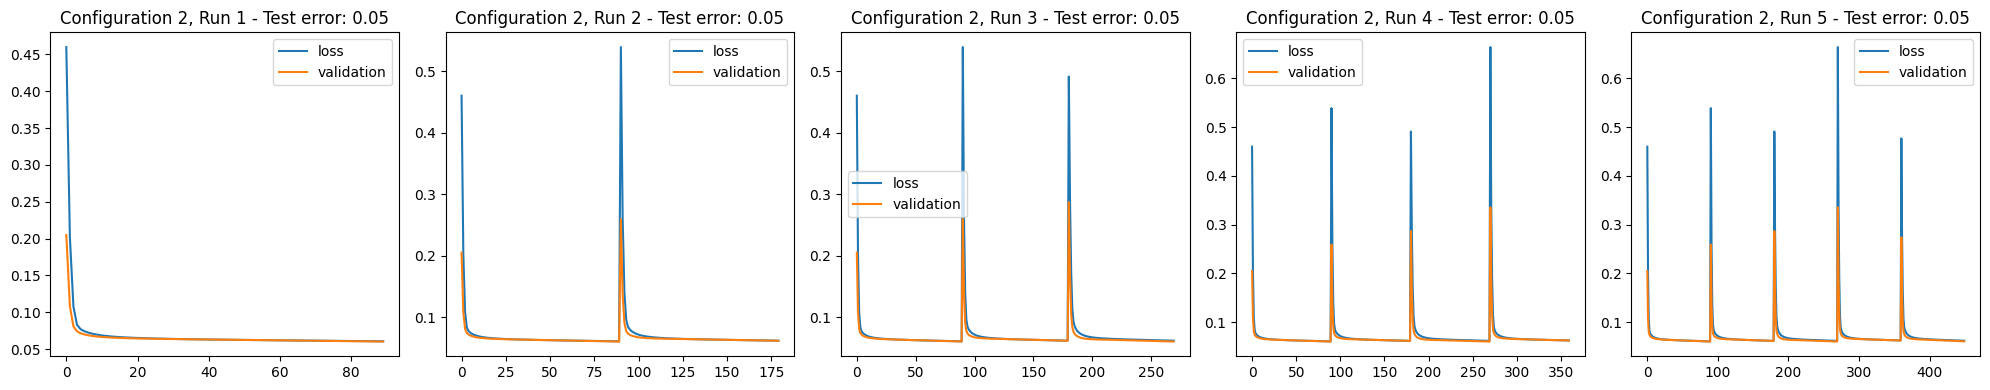

In [181]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

configurations_list = [
    # Configuration 9
    {"layers": [X_train.shape[1], 3, 1], "epochs": 90, "learning_rate": 0.001, "batch_size": 128, "validation_split": 0.2},
    # Configuration 10
    {"layers": [X_train.shape[1], 2, 1], "epochs": 90, "learning_rate": 0.001, "batch_size": 256, "validation_split": 0.2}
]
# Run the model multiple times with each configuration
# Run the model multiple times with each configuration
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        # Print test error
        test_error = mean_squared_error(y_test, y_pred)
        plt.title(f"Configuration {idx+1}, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()

## Modifying few configurations of the following
a) network shape
b) learning rate
c) batch size
d) validation size
e) number of epochs


Selected and Modified configurations of the following:
a) network shape
b) learning rate
c) batch size
d) validation size
e) number of epochs

Increased Number of Epochs and Validation size

# Configuration 1 - layers: [X_train.shape[1], 32,16, 8,1],epochs: 500, learning_rate: 0.01, batch_size: 32, validation_split: 0.2
# Configuration 2 - layers: [X_train.shape[1], 16, 8,1], epochs: 600, learning_rate: 0.001,batch_size: 64, validation_split: 0.3

<ipython-input-167-18cdf3eed594>:103: RuntimeWarning: overflow encountered in matmul
  grad = grad @ self.__layers[i][0].T
<ipython-input-167-18cdf3eed594>:77: RuntimeWarning: overflow encountered in matmul
  batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]
<ipython-input-167-18cdf3eed594>:90: RuntimeWarning: overflow encountered in square
  return (actual - predicted) ** 2
<ipython-input-167-18cdf3eed594>:41: RuntimeWarning: overflow encountered in square
  epoch_losses.append(np.mean(loss ** 2))
<ipython-input-167-18cdf3eed594>:97: RuntimeWarning: overflow encountered in matmul
  w_grad = hidden[i].T @ grad
<ipython-input-167-18cdf3eed594>:97: RuntimeWarning: invalid value encountered in matmul
  w_grad = hidden[i].T @ grad


Epoch: 0 Train MSE: 5.142661339314543e+35 Valid MSE: inf
Epoch: 1 Train MSE: nan Valid MSE: nan
Epoch: 2 Train MSE: nan Valid MSE: nan
Epoch: 3 Train MSE: nan Valid MSE: nan
Epoch: 4 Train MSE: nan Valid MSE: nan
Epoch: 5 Train MSE: nan Valid MSE: nan
Epoch: 6 Train MSE: nan Valid MSE: nan
Epoch: 7 Train MSE: nan Valid MSE: nan
Epoch: 8 Train MSE: nan Valid MSE: nan
Epoch: 9 Train MSE: nan Valid MSE: nan
Epoch: 10 Train MSE: nan Valid MSE: nan
Epoch: 11 Train MSE: nan Valid MSE: nan
Epoch: 12 Train MSE: nan Valid MSE: nan
Epoch: 13 Train MSE: nan Valid MSE: nan
Epoch: 14 Train MSE: nan Valid MSE: nan
Epoch: 15 Train MSE: nan Valid MSE: nan
Epoch: 16 Train MSE: nan Valid MSE: nan
Epoch: 17 Train MSE: nan Valid MSE: nan
Epoch: 18 Train MSE: nan Valid MSE: nan
Epoch: 19 Train MSE: nan Valid MSE: nan
Epoch: 20 Train MSE: nan Valid MSE: nan
Epoch: 21 Train MSE: nan Valid MSE: nan
Epoch: 22 Train MSE: nan Valid MSE: nan
Epoch: 23 Train MSE: nan Valid MSE: nan
Epoch: 24 Train MSE: nan Valid M

<ipython-input-167-18cdf3eed594>:95: RuntimeWarning: invalid value encountered in multiply
  grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))


Epoch: 61 Train MSE: nan Valid MSE: nan
Epoch: 62 Train MSE: nan Valid MSE: nan
Epoch: 63 Train MSE: nan Valid MSE: nan
Epoch: 64 Train MSE: nan Valid MSE: nan
Epoch: 65 Train MSE: nan Valid MSE: nan
Epoch: 66 Train MSE: nan Valid MSE: nan
Epoch: 67 Train MSE: nan Valid MSE: nan
Epoch: 68 Train MSE: nan Valid MSE: nan
Epoch: 69 Train MSE: nan Valid MSE: nan
Epoch: 70 Train MSE: nan Valid MSE: nan
Epoch: 71 Train MSE: nan Valid MSE: nan
Epoch: 72 Train MSE: nan Valid MSE: nan
Epoch: 73 Train MSE: nan Valid MSE: nan
Epoch: 74 Train MSE: nan Valid MSE: nan
Epoch: 75 Train MSE: nan Valid MSE: nan
Epoch: 76 Train MSE: nan Valid MSE: nan
Epoch: 77 Train MSE: nan Valid MSE: nan
Epoch: 78 Train MSE: nan Valid MSE: nan
Epoch: 79 Train MSE: nan Valid MSE: nan
Epoch: 80 Train MSE: nan Valid MSE: nan
Epoch: 81 Train MSE: nan Valid MSE: nan
Epoch: 82 Train MSE: nan Valid MSE: nan
Epoch: 83 Train MSE: nan Valid MSE: nan
Epoch: 84 Train MSE: nan Valid MSE: nan
Epoch: 85 Train MSE: nan Valid MSE: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-167-18cdf3eed594>:103: RuntimeWarning: invalid value encountered in matmul
  grad = grad @ self.__layers[i][0].T
<ipython-input-167-18cdf3eed594>:77: RuntimeWarning: invalid value encountered in matmul
  batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]
<ipython-input-167-18cdf3eed594>:77: RuntimeWarning: invalid value encountered in add
  batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]


Epoch: 91 Train MSE: nan Valid MSE: nan
Epoch: 92 Train MSE: nan Valid MSE: nan
Epoch: 93 Train MSE: nan Valid MSE: nan
Epoch: 94 Train MSE: nan Valid MSE: nan
Epoch: 95 Train MSE: nan Valid MSE: nan
Epoch: 96 Train MSE: nan Valid MSE: nan
Epoch: 97 Train MSE: nan Valid MSE: nan
Epoch: 98 Train MSE: nan Valid MSE: nan
Epoch: 99 Train MSE: nan Valid MSE: nan
Epoch: 100 Train MSE: nan Valid MSE: nan
Epoch: 101 Train MSE: nan Valid MSE: nan
Epoch: 102 Train MSE: nan Valid MSE: nan
Epoch: 103 Train MSE: nan Valid MSE: nan
Epoch: 104 Train MSE: nan Valid MSE: nan
Epoch: 105 Train MSE: nan Valid MSE: nan
Epoch: 106 Train MSE: nan Valid MSE: nan
Epoch: 107 Train MSE: nan Valid MSE: nan
Epoch: 108 Train MSE: nan Valid MSE: nan
Epoch: 109 Train MSE: nan Valid MSE: nan
Epoch: 110 Train MSE: nan Valid MSE: nan
Epoch: 111 Train MSE: nan Valid MSE: nan
Epoch: 112 Train MSE: nan Valid MSE: nan
Epoch: 113 Train MSE: nan Valid MSE: nan
Epoch: 114 Train MSE: nan Valid MSE: nan
Epoch: 115 Train MSE: nan

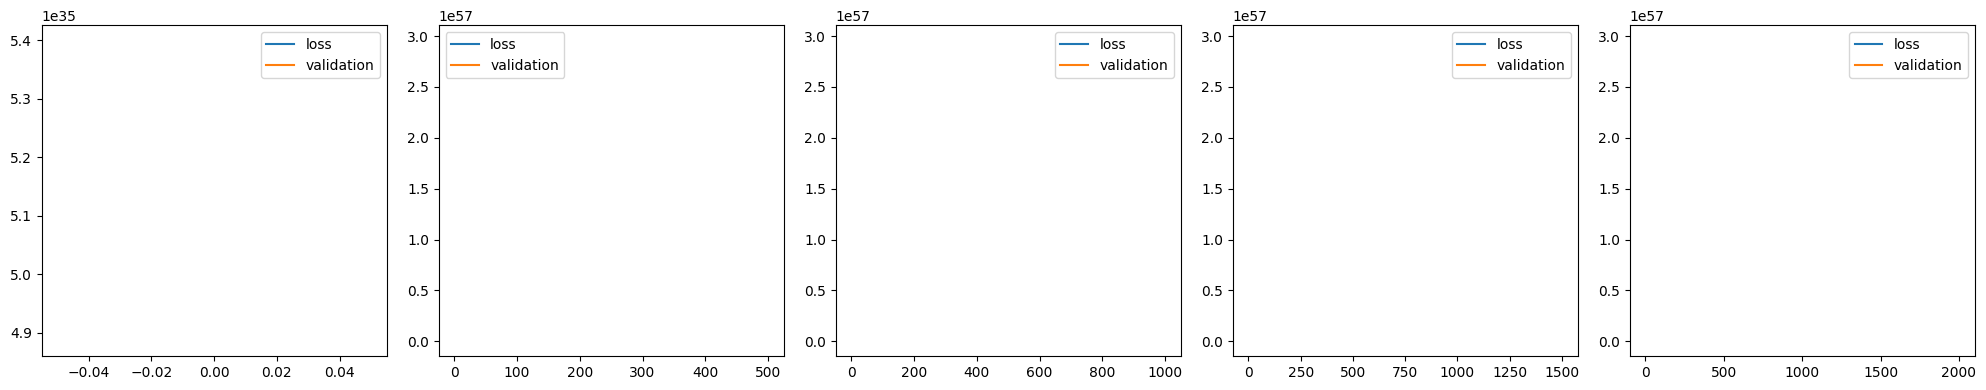

Epoch: 0 Train MSE: 0.5372910151940054 Valid MSE: 0.29006181461812014
Epoch: 1 Train MSE: 0.2646171549234049 Valid MSE: 0.23407222502082406
Epoch: 2 Train MSE: 0.23869607885093513 Valid MSE: 0.22614362295688115
Epoch: 3 Train MSE: 0.23576442618694288 Valid MSE: 0.2234655650177696
Epoch: 4 Train MSE: 0.2341883288952784 Valid MSE: 0.22156645552968002
Epoch: 5 Train MSE: 0.23266530865891977 Valid MSE: 0.21979505524886495
Epoch: 6 Train MSE: 0.23112111468661717 Valid MSE: 0.21801965814630525
Epoch: 7 Train MSE: 0.22954298421758593 Valid MSE: 0.21620658349312152
Epoch: 8 Train MSE: 0.2279255206005897 Valid MSE: 0.21434118137812094
Epoch: 9 Train MSE: 0.22625650171503195 Valid MSE: 0.2124101783320822
Epoch: 10 Train MSE: 0.22452539869370503 Valid MSE: 0.21040646050105558
Epoch: 11 Train MSE: 0.22273200057516412 Valid MSE: 0.20832133131679725
Epoch: 12 Train MSE: 0.22086101289756502 Valid MSE: 0.2061400779694645
Epoch: 13 Train MSE: 0.21890175635432668 Valid MSE: 0.2038546506646267
Epoch: 14 

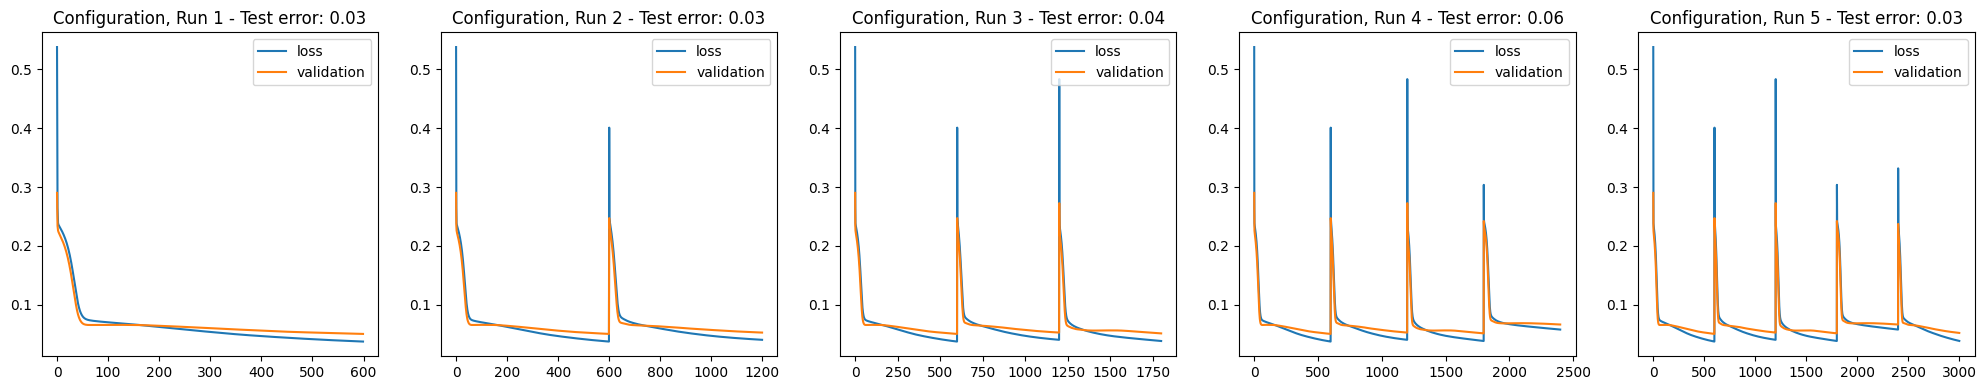

In [182]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
configurations_list = [
    # Configuration 1
    {"layers": [X_train.shape[1], 32,16, 8,1], "epochs": 500, "learning_rate": 0.01, "batch_size": 32, "validation_split": 0.2},
    # Configuration 2
    {"layers": [X_train.shape[1], 16, 8,1], "epochs": 600, "learning_rate": 0.001, "batch_size": 64, "validation_split": 0.3}
]
# Run the model multiple times with each configuration
i1=2
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        if np.isnan(y_pred).any():
            print("NaN values found in predictions. Skipping this run.")
            continue
        valid_indices = ~np.isnan(y_test).flatten()
        y_test_valid = y_test[valid_indices]
        y_pred_valid = y_pred[valid_indices]

    # Calculate test error

        test_error = mean_squared_error(y_test_valid, y_pred_valid)
        plt.title(f"Configuration, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()


Modified Batch size and Netwrok shape
# Configuration 3- layers: [X_train.shape[1], 64,32,1],epochs: 300, learning_rate: 0.01,batch_size: 128,validation_split: 0.2

# Configuration 4 - layers: [X_train.shape[1], 32,16,1],epochs: 500, learning_rate: 0.001,batch_size: 32,validation_split: 0.3

Epoch: 0 Train MSE: 4.964921201473477 Valid MSE: 1.2882641650045549e+19
Epoch: 1 Train MSE: 2.2655028881956057e+222 Valid MSE: nan
Epoch: 2 Train MSE: nan Valid MSE: nan
Epoch: 3 Train MSE: nan Valid MSE: nan
Epoch: 4 Train MSE: nan Valid MSE: nan
Epoch: 5 Train MSE: nan Valid MSE: nan
Epoch: 6 Train MSE: nan Valid MSE: nan
Epoch: 7 Train MSE: nan Valid MSE: nan
Epoch: 8 Train MSE: nan Valid MSE: nan
Epoch: 9 Train MSE: nan Valid MSE: nan
Epoch: 10 Train MSE: nan Valid MSE: nan
Epoch: 11 Train MSE: nan Valid MSE: nan
Epoch: 12 Train MSE: nan Valid MSE: nan
Epoch: 13 Train MSE: nan Valid MSE: nan
Epoch: 14 Train MSE: nan Valid MSE: nan
Epoch: 15 Train MSE: nan Valid MSE: nan
Epoch: 16 Train MSE: nan Valid MSE: nan
Epoch: 17 Train MSE: nan Valid MSE: nan
Epoch: 18 Train MSE: nan Valid MSE: nan
Epoch: 19 Train MSE: nan Valid MSE: nan
Epoch: 20 Train MSE: nan Valid MSE: nan
Epoch: 21 Train MSE: nan Valid MSE: nan
Epoch: 22 Train MSE: nan Valid MSE: nan
Epoch: 23 Train MSE: nan Valid MSE: n

<ipython-input-167-18cdf3eed594>:103: RuntimeWarning: overflow encountered in matmul
  grad = grad @ self.__layers[i][0].T
<ipython-input-167-18cdf3eed594>:95: RuntimeWarning: invalid value encountered in multiply
  grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))
<ipython-input-167-18cdf3eed594>:97: RuntimeWarning: invalid value encountered in matmul
  w_grad = hidden[i].T @ grad


Epoch: 104 Train MSE: nan Valid MSE: nan
Epoch: 105 Train MSE: nan Valid MSE: nan
Epoch: 106 Train MSE: nan Valid MSE: nan
Epoch: 107 Train MSE: nan Valid MSE: nan
Epoch: 108 Train MSE: nan Valid MSE: nan
Epoch: 109 Train MSE: nan Valid MSE: nan
Epoch: 110 Train MSE: nan Valid MSE: nan
Epoch: 111 Train MSE: nan Valid MSE: nan
Epoch: 112 Train MSE: nan Valid MSE: nan
Epoch: 113 Train MSE: nan Valid MSE: nan
Epoch: 114 Train MSE: nan Valid MSE: nan
Epoch: 115 Train MSE: nan Valid MSE: nan
Epoch: 116 Train MSE: nan Valid MSE: nan
Epoch: 117 Train MSE: nan Valid MSE: nan
Epoch: 118 Train MSE: nan Valid MSE: nan
Epoch: 119 Train MSE: nan Valid MSE: nan
Epoch: 120 Train MSE: nan Valid MSE: nan
Epoch: 121 Train MSE: nan Valid MSE: nan
Epoch: 122 Train MSE: nan Valid MSE: nan
Epoch: 123 Train MSE: nan Valid MSE: nan
Epoch: 124 Train MSE: nan Valid MSE: nan
Epoch: 125 Train MSE: nan Valid MSE: nan
Epoch: 126 Train MSE: nan Valid MSE: nan
Epoch: 127 Train MSE: nan Valid MSE: nan
Epoch: 128 Train

<ipython-input-167-18cdf3eed594>:77: RuntimeWarning: overflow encountered in matmul
  batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]
<ipython-input-167-18cdf3eed594>:41: RuntimeWarning: overflow encountered in square
  epoch_losses.append(np.mean(loss ** 2))
<ipython-input-167-18cdf3eed594>:97: RuntimeWarning: overflow encountered in matmul
  w_grad = hidden[i].T @ grad


Epoch: 9 Train MSE: nan Valid MSE: nan
Epoch: 10 Train MSE: nan Valid MSE: nan
Epoch: 11 Train MSE: nan Valid MSE: nan
Epoch: 12 Train MSE: nan Valid MSE: nan
Epoch: 13 Train MSE: nan Valid MSE: nan
Epoch: 14 Train MSE: nan Valid MSE: nan
Epoch: 15 Train MSE: nan Valid MSE: nan
Epoch: 16 Train MSE: nan Valid MSE: nan
Epoch: 17 Train MSE: nan Valid MSE: nan
Epoch: 18 Train MSE: nan Valid MSE: nan
Epoch: 19 Train MSE: nan Valid MSE: nan
Epoch: 20 Train MSE: nan Valid MSE: nan
Epoch: 21 Train MSE: nan Valid MSE: nan
Epoch: 22 Train MSE: nan Valid MSE: nan
Epoch: 23 Train MSE: nan Valid MSE: nan
Epoch: 24 Train MSE: nan Valid MSE: nan
Epoch: 25 Train MSE: nan Valid MSE: nan
Epoch: 26 Train MSE: nan Valid MSE: nan
Epoch: 27 Train MSE: nan Valid MSE: nan
Epoch: 28 Train MSE: nan Valid MSE: nan
Epoch: 29 Train MSE: nan Valid MSE: nan
Epoch: 30 Train MSE: nan Valid MSE: nan
Epoch: 31 Train MSE: nan Valid MSE: nan
Epoch: 32 Train MSE: nan Valid MSE: nan
Epoch: 33 Train MSE: nan Valid MSE: nan
E

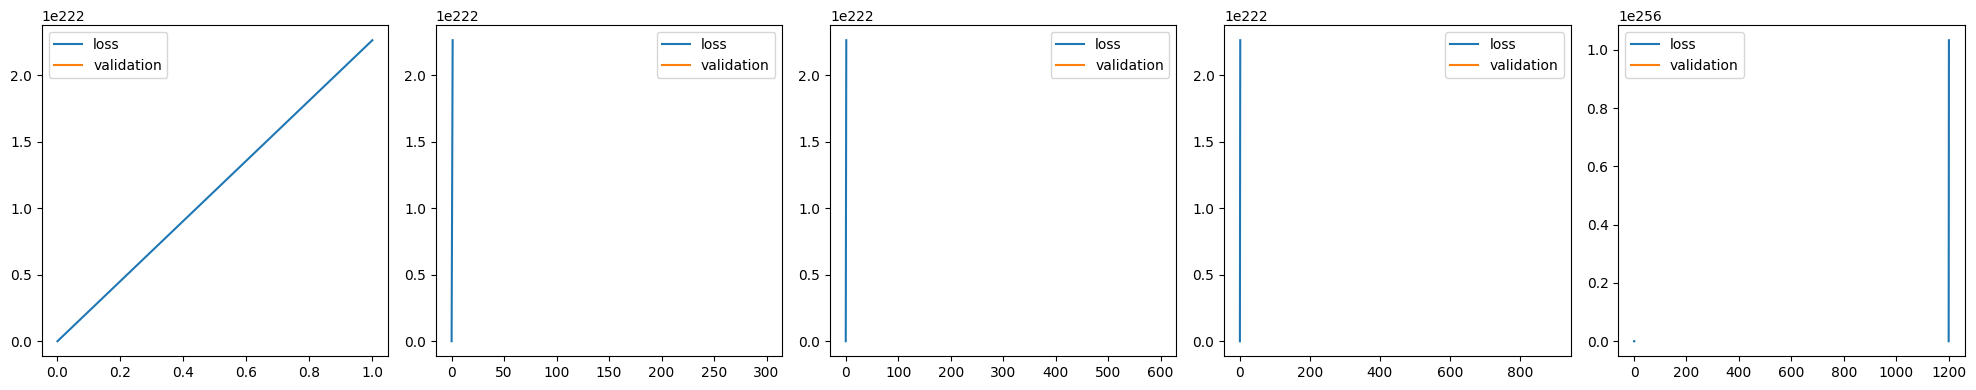

Epoch: 0 Train MSE: 0.9056660188038226 Valid MSE: 0.25661255868036514
Epoch: 1 Train MSE: 0.24646250087318122 Valid MSE: 0.22999911075726848
Epoch: 2 Train MSE: 0.23607970971278208 Valid MSE: 0.2259764891218574
Epoch: 3 Train MSE: 0.23300084081636724 Valid MSE: 0.22291907918235704
Epoch: 4 Train MSE: 0.2300014571412528 Valid MSE: 0.21994685641797726
Epoch: 5 Train MSE: 0.2270058444468031 Valid MSE: 0.21697755391569515
Epoch: 6 Train MSE: 0.2239975037863501 Valid MSE: 0.21399097677345713
Epoch: 7 Train MSE: 0.2209616263783551 Valid MSE: 0.21097316992505388
Epoch: 8 Train MSE: 0.2178843828956691 Valid MSE: 0.20791325779460512
Epoch: 9 Train MSE: 0.214752823531486 Valid MSE: 0.2047983987917662
Epoch: 10 Train MSE: 0.21155483447311102 Valid MSE: 0.2016176239347489
Epoch: 11 Train MSE: 0.20827913213486404 Valid MSE: 0.19836078931844317
Epoch: 12 Train MSE: 0.20491529272466347 Valid MSE: 0.19501891641296284
Epoch: 13 Train MSE: 0.20145381645410676 Valid MSE: 0.19158404304341292
Epoch: 14 Tra

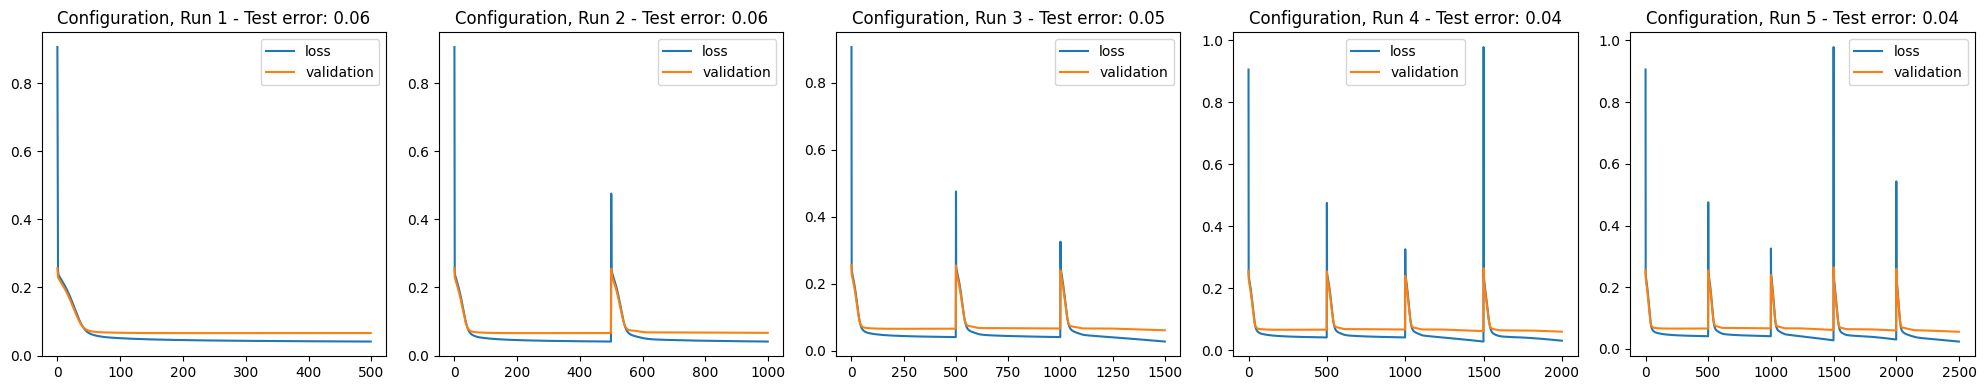

In [183]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
configurations_list = [
    # Configuration 3
    {"layers": [X_train.shape[1], 64,32,1], "epochs": 300, "learning_rate": 0.01, "batch_size": 128, "validation_split": 0.2},
    # Configuration 4
    {"layers": [X_train.shape[1], 32,16,1], "epochs": 500, "learning_rate": 0.001, "batch_size": 32, "validation_split": 0.3}
]
# Run the model multiple times with each configuration
i1=2
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        if np.isnan(y_pred).any():
            print("NaN values found in predictions. Skipping this run.")
            continue
        valid_indices = ~np.isnan(y_test).flatten()
        y_test_valid = y_test[valid_indices]
        y_pred_valid = y_pred[valid_indices]

    # Calculate test error

        test_error = mean_squared_error(y_test_valid, y_pred_valid)
        plt.title(f"Configuration, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()


 # Configuration 5 - layers: [X_train.shape[1], 64, 32, 16, 8, 1],epochs: 250, learning_rate: 0.01,batch_size: 32,validation_split: 0.2

# Configuration 6 - layers": [X_train.shape[1], 16, 8, 1],epochs: 300, learning_rate: 0.001,batch_size: 64,validation_split: 0.3

<ipython-input-167-18cdf3eed594>:97: RuntimeWarning: overflow encountered in matmul
  w_grad = hidden[i].T @ grad
<ipython-input-167-18cdf3eed594>:97: RuntimeWarning: invalid value encountered in matmul
  w_grad = hidden[i].T @ grad


Epoch: 0 Train MSE: nan Valid MSE: nan
Epoch: 1 Train MSE: nan Valid MSE: nan
Epoch: 2 Train MSE: nan Valid MSE: nan
Epoch: 3 Train MSE: nan Valid MSE: nan
Epoch: 4 Train MSE: nan Valid MSE: nan
Epoch: 5 Train MSE: nan Valid MSE: nan
Epoch: 6 Train MSE: nan Valid MSE: nan
Epoch: 7 Train MSE: nan Valid MSE: nan
Epoch: 8 Train MSE: nan Valid MSE: nan
Epoch: 9 Train MSE: nan Valid MSE: nan
Epoch: 10 Train MSE: nan Valid MSE: nan
Epoch: 11 Train MSE: nan Valid MSE: nan
Epoch: 12 Train MSE: nan Valid MSE: nan
Epoch: 13 Train MSE: nan Valid MSE: nan
Epoch: 14 Train MSE: nan Valid MSE: nan
Epoch: 15 Train MSE: nan Valid MSE: nan
Epoch: 16 Train MSE: nan Valid MSE: nan
Epoch: 17 Train MSE: nan Valid MSE: nan
Epoch: 18 Train MSE: nan Valid MSE: nan
Epoch: 19 Train MSE: nan Valid MSE: nan
Epoch: 20 Train MSE: nan Valid MSE: nan
Epoch: 21 Train MSE: nan Valid MSE: nan
Epoch: 22 Train MSE: nan Valid MSE: nan
Epoch: 23 Train MSE: nan Valid MSE: nan
Epoch: 24 Train MSE: nan Valid MSE: nan
Epoch: 25 

<ipython-input-167-18cdf3eed594>:103: RuntimeWarning: overflow encountered in matmul
  grad = grad @ self.__layers[i][0].T


Epoch: 64 Train MSE: nan Valid MSE: nan
Epoch: 65 Train MSE: nan Valid MSE: nan
Epoch: 66 Train MSE: nan Valid MSE: nan
Epoch: 67 Train MSE: nan Valid MSE: nan
Epoch: 68 Train MSE: nan Valid MSE: nan
Epoch: 69 Train MSE: nan Valid MSE: nan
Epoch: 70 Train MSE: nan Valid MSE: nan
Epoch: 71 Train MSE: nan Valid MSE: nan
Epoch: 72 Train MSE: nan Valid MSE: nan
Epoch: 73 Train MSE: nan Valid MSE: nan
Epoch: 74 Train MSE: nan Valid MSE: nan
Epoch: 75 Train MSE: nan Valid MSE: nan
Epoch: 76 Train MSE: nan Valid MSE: nan
Epoch: 77 Train MSE: nan Valid MSE: nan
Epoch: 78 Train MSE: nan Valid MSE: nan
Epoch: 79 Train MSE: nan Valid MSE: nan
Epoch: 80 Train MSE: nan Valid MSE: nan
Epoch: 81 Train MSE: nan Valid MSE: nan
Epoch: 82 Train MSE: nan Valid MSE: nan
Epoch: 83 Train MSE: nan Valid MSE: nan
Epoch: 84 Train MSE: nan Valid MSE: nan
Epoch: 85 Train MSE: nan Valid MSE: nan
Epoch: 86 Train MSE: nan Valid MSE: nan
Epoch: 87 Train MSE: nan Valid MSE: nan
Epoch: 88 Train MSE: nan Valid MSE: nan


<ipython-input-167-18cdf3eed594>:95: RuntimeWarning: invalid value encountered in multiply
  grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))


Epoch: 24 Train MSE: nan Valid MSE: nan
Epoch: 25 Train MSE: nan Valid MSE: nan
Epoch: 26 Train MSE: nan Valid MSE: nan
Epoch: 27 Train MSE: nan Valid MSE: nan
Epoch: 28 Train MSE: nan Valid MSE: nan
Epoch: 29 Train MSE: nan Valid MSE: nan
Epoch: 30 Train MSE: nan Valid MSE: nan
Epoch: 31 Train MSE: nan Valid MSE: nan
Epoch: 32 Train MSE: nan Valid MSE: nan
Epoch: 33 Train MSE: nan Valid MSE: nan
Epoch: 34 Train MSE: nan Valid MSE: nan
Epoch: 35 Train MSE: nan Valid MSE: nan
Epoch: 36 Train MSE: nan Valid MSE: nan
Epoch: 37 Train MSE: nan Valid MSE: nan
Epoch: 38 Train MSE: nan Valid MSE: nan
Epoch: 39 Train MSE: nan Valid MSE: nan
Epoch: 40 Train MSE: nan Valid MSE: nan
Epoch: 41 Train MSE: nan Valid MSE: nan
Epoch: 42 Train MSE: nan Valid MSE: nan
Epoch: 43 Train MSE: nan Valid MSE: nan
Epoch: 44 Train MSE: nan Valid MSE: nan
Epoch: 45 Train MSE: nan Valid MSE: nan
Epoch: 46 Train MSE: nan Valid MSE: nan
Epoch: 47 Train MSE: nan Valid MSE: nan
Epoch: 48 Train MSE: nan Valid MSE: nan


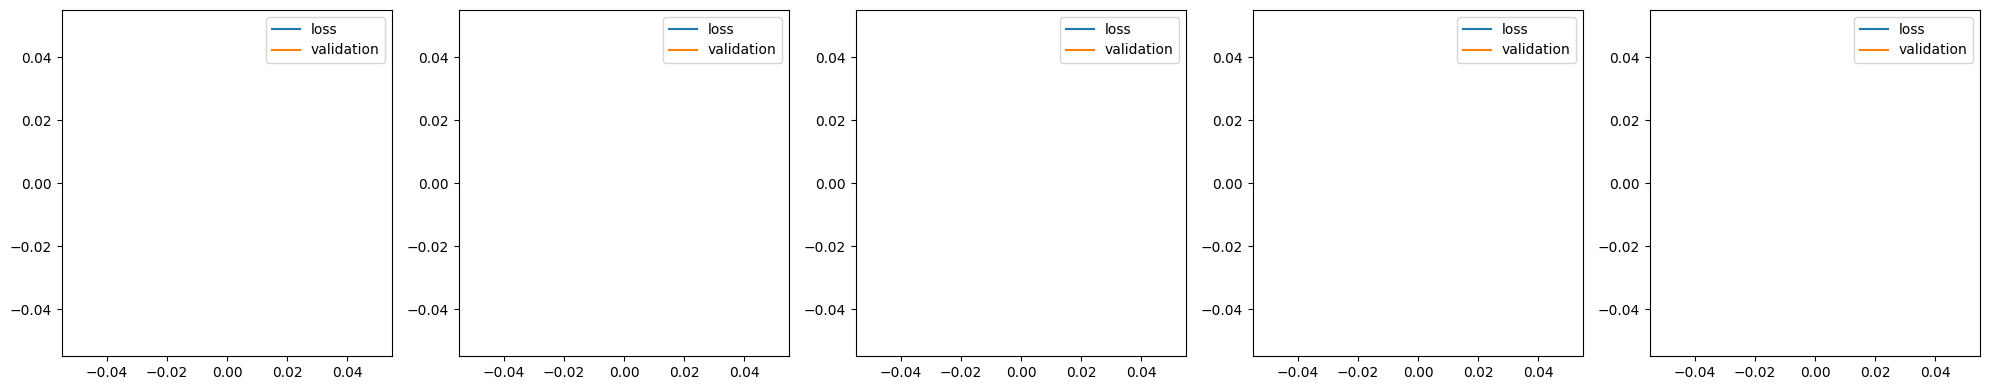

Epoch: 0 Train MSE: 0.3991995860669493 Valid MSE: 0.2528768824895087
Epoch: 1 Train MSE: 0.24191865727046097 Valid MSE: 0.22152278447806634
Epoch: 2 Train MSE: 0.22831706924564166 Valid MSE: 0.21506839816801396
Epoch: 3 Train MSE: 0.22493248933049445 Valid MSE: 0.21129740924610038
Epoch: 4 Train MSE: 0.2219976925933954 Valid MSE: 0.20789520493698355
Epoch: 5 Train MSE: 0.21900989462434142 Valid MSE: 0.2044824396099356
Epoch: 6 Train MSE: 0.21592342323571773 Valid MSE: 0.20096963453646538
Epoch: 7 Train MSE: 0.2127144779651366 Valid MSE: 0.1973184648287028
Epoch: 8 Train MSE: 0.20936107259016057 Valid MSE: 0.193507146391961
Epoch: 9 Train MSE: 0.20584189322541002 Valid MSE: 0.18951139453734794
Epoch: 10 Train MSE: 0.20213632192835987 Valid MSE: 0.185315572996262
Epoch: 11 Train MSE: 0.19822470662625827 Valid MSE: 0.180899751661972
Epoch: 12 Train MSE: 0.19408882056647708 Valid MSE: 0.17625263150611162
Epoch: 13 Train MSE: 0.1897125271443354 Valid MSE: 0.1713586026330389
Epoch: 14 Train 

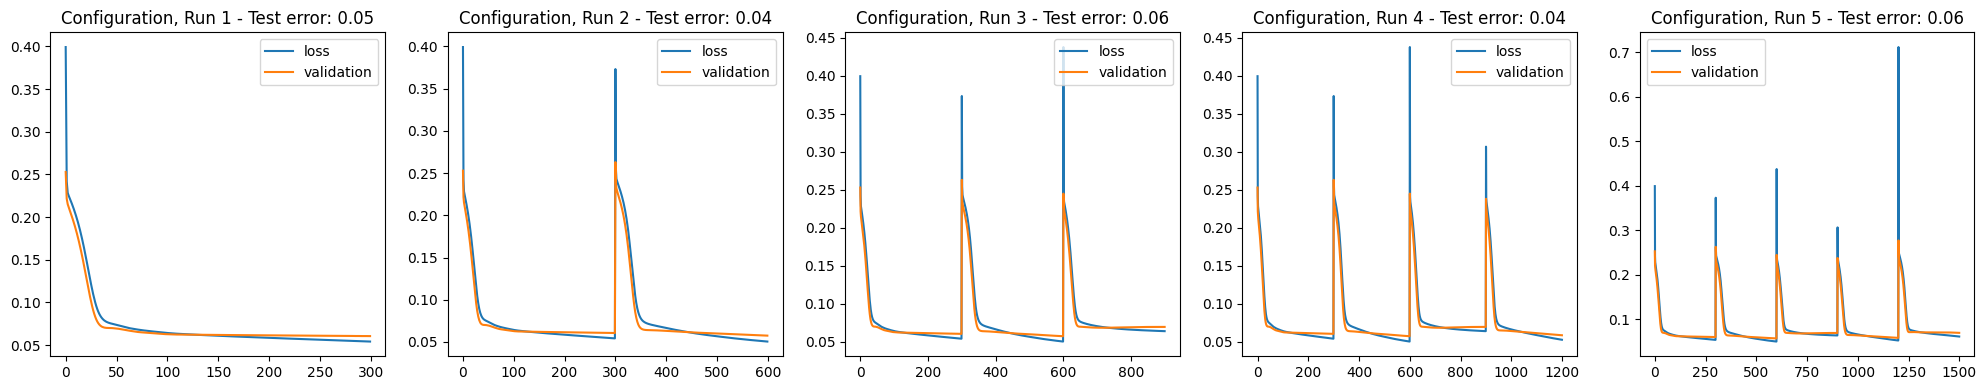

In [184]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
configurations_list = [
    # Configuration 5
    {"layers": [X_train.shape[1], 64, 32, 16, 8, 1], "epochs": 250, "learning_rate": 0.01, "batch_size": 32, "validation_split": 0.2},
    # Configuration 6
    {"layers": [X_train.shape[1], 16, 8, 1], "epochs": 300, "learning_rate": 0.001, "batch_size": 64, "validation_split": 0.3}
]
# Run the model multiple times with each configuration
i1=2
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        if np.isnan(y_pred).any():
            print("NaN values found in predictions. Skipping this run.")
            continue
        valid_indices = ~np.isnan(y_test).flatten()
        y_test_valid = y_test[valid_indices]
        y_pred_valid = y_pred[valid_indices]

    # Calculate test error

        test_error = mean_squared_error(y_test_valid, y_pred_valid)
        plt.title(f"Configuration, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()


# Configuration 7 - layers: [X_train.shape[1], 16, 8, 1], epochs: 550, learning_rate: 0.001,batch_size: 64,validation_split: 0.25}

# Configuration 8 - layers: [X_train.shape[1], 32, 16, 8, 1],epochs: 700, learning_rate: 0.0001,batch_size: 128,validation_split: 0.25}

Epoch: 0 Train MSE: 0.44806151174455033 Valid MSE: 0.24219080228191897
Epoch: 1 Train MSE: 0.2300203256861672 Valid MSE: 0.2289861012613227
Epoch: 2 Train MSE: 0.21209827008045953 Valid MSE: 0.22716181209688766
Epoch: 3 Train MSE: 0.20792715946713203 Valid MSE: 0.22385554622907702
Epoch: 4 Train MSE: 0.2042281703779874 Valid MSE: 0.22002878163406495
Epoch: 5 Train MSE: 0.2004158916743087 Valid MSE: 0.21595365289039967
Epoch: 6 Train MSE: 0.19643486622911638 Valid MSE: 0.21165509496000975
Epoch: 7 Train MSE: 0.19225022705341885 Valid MSE: 0.20710939430043573
Epoch: 8 Train MSE: 0.18782922044440753 Valid MSE: 0.20228569163441834
Epoch: 9 Train MSE: 0.1831408624621776 Valid MSE: 0.19715423345695401
Epoch: 10 Train MSE: 0.17818751481281186 Valid MSE: 0.19172464639875142
Epoch: 11 Train MSE: 0.1729555002389817 Valid MSE: 0.18596766874417575
Epoch: 12 Train MSE: 0.16739046690117 Valid MSE: 0.17985101106588328
Epoch: 13 Train MSE: 0.16147954567037184 Valid MSE: 0.17337180867542534
Epoch: 14 T

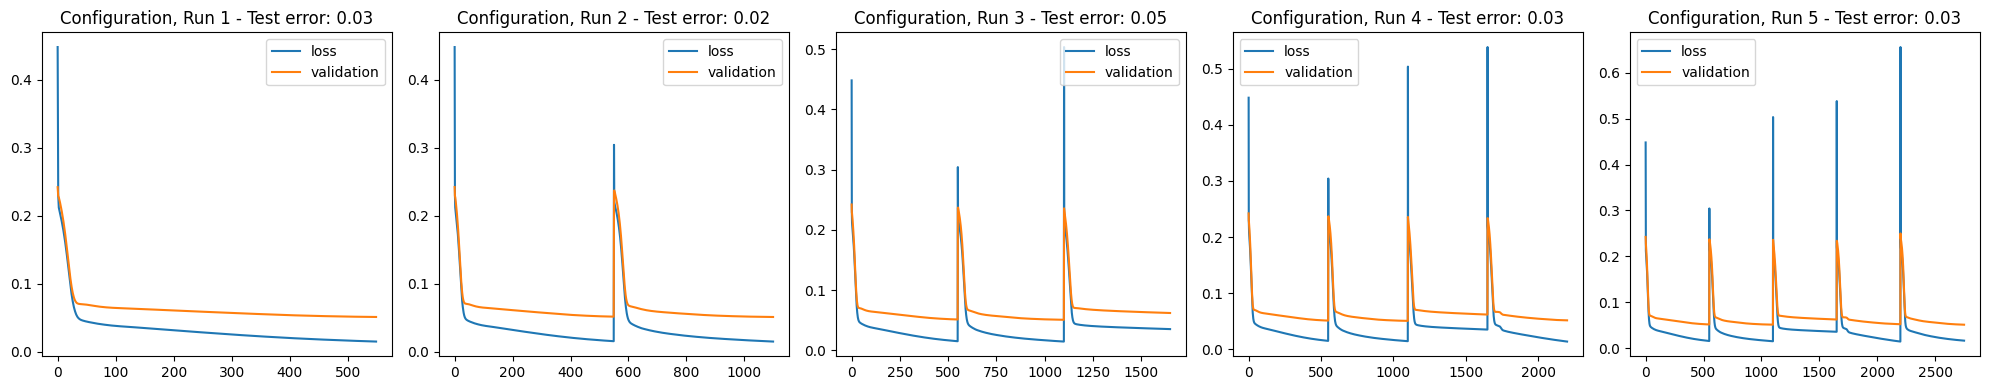

Epoch: 0 Train MSE: 0.6998047153946032 Valid MSE: 0.4991838206586233
Epoch: 1 Train MSE: 0.4525600896337408 Valid MSE: 0.3559076412218454
Epoch: 2 Train MSE: 0.3347313245104365 Valid MSE: 0.28899068681884954
Epoch: 3 Train MSE: 0.2792902624315391 Valid MSE: 0.258950981996048
Epoch: 4 Train MSE: 0.25404030214702344 Valid MSE: 0.24609409609021723
Epoch: 5 Train MSE: 0.24289653038233822 Valid MSE: 0.24085251062278895
Epoch: 6 Train MSE: 0.23808172626109492 Valid MSE: 0.23881858360754932
Epoch: 7 Train MSE: 0.23601085351906417 Valid MSE: 0.23806673834936387
Epoch: 8 Train MSE: 0.2350992795010159 Valid MSE: 0.23779540655469913
Epoch: 9 Train MSE: 0.23466849456533503 Valid MSE: 0.23768657725248282
Epoch: 10 Train MSE: 0.2344344690389207 Valid MSE: 0.23762132653053358
Epoch: 11 Train MSE: 0.23428016931213416 Valid MSE: 0.23755921634087762
Epoch: 12 Train MSE: 0.23415791282857634 Valid MSE: 0.23748911679428533
Epoch: 13 Train MSE: 0.23404843916527787 Valid MSE: 0.23740991744704668
Epoch: 14 Tr

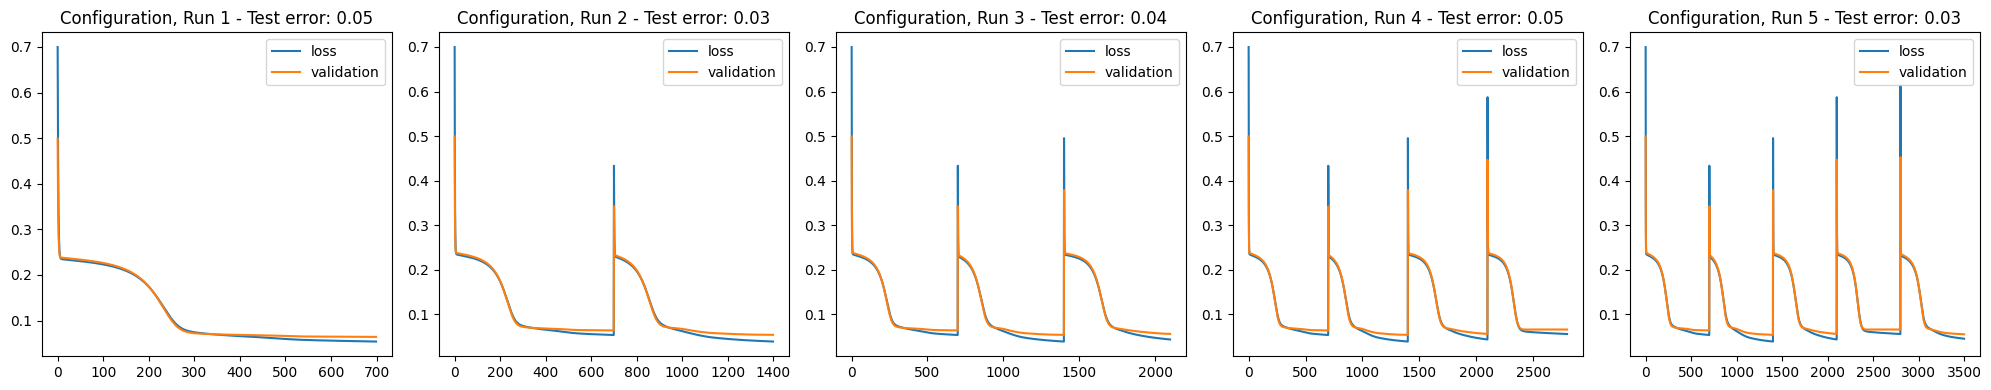

In [185]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
configurations_list = [
    # Configuration 7
    {"layers": [X_train.shape[1], 16, 8, 1], "epochs": 550, "learning_rate": 0.001, "batch_size": 64, "validation_split": 0.25},
    # Configuration 8
    {"layers": [X_train.shape[1], 32, 16, 8, 1], "epochs": 700, "learning_rate": 0.0001, "batch_size": 128, "validation_split": 0.25},
]
# Run the model multiple times with each configuration
i1=2
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        if np.isnan(y_pred).any():
            print("NaN values found in predictions. Skipping this run.")
            continue
        valid_indices = ~np.isnan(y_test).flatten()
        y_test_valid = y_test[valid_indices]
        y_pred_valid = y_pred[valid_indices]

    # Calculate test error

        test_error = mean_squared_error(y_test_valid, y_pred_valid)
        plt.title(f"Configuration, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()


# Configuration 9- layers: [X_train.shape[1], 64, 32, 1],epochs: 200, learning_rate: 0.001,batch_size: 32,validation_split: 0.2

# Configuration 10 - layers: [X_train.shape[1],32, 16, 8, 1],epochs: 300, learning_rate: 0.001, batch_size: 64, validation_split: 0.3

Epoch: 0 Train MSE: 1.1849960504399397 Valid MSE: 0.2849685351453169
Epoch: 1 Train MSE: 0.26375458092437143 Valid MSE: 0.2111716546277688
Epoch: 2 Train MSE: 0.188119948759998 Valid MSE: 0.2139119553445656
Epoch: 3 Train MSE: 0.17881492139078942 Valid MSE: 0.21689126426416075
Epoch: 4 Train MSE: 0.1749659465517471 Valid MSE: 0.2154877122410578
Epoch: 5 Train MSE: 0.17019483706729271 Valid MSE: 0.21164107370161303
Epoch: 6 Train MSE: 0.16460354865422722 Valid MSE: 0.2067085111508055
Epoch: 7 Train MSE: 0.1586547802390905 Valid MSE: 0.20133694951532577
Epoch: 8 Train MSE: 0.15263576678743654 Valid MSE: 0.19579200604639319
Epoch: 9 Train MSE: 0.14661767782595103 Valid MSE: 0.19017740490424778
Epoch: 10 Train MSE: 0.14064408488705643 Valid MSE: 0.18456971328958735
Epoch: 11 Train MSE: 0.1347693590456876 Valid MSE: 0.17899849149751781
Epoch: 12 Train MSE: 0.12901182441979608 Valid MSE: 0.1734951488072535
Epoch: 13 Train MSE: 0.12339934051008841 Valid MSE: 0.1680903277190388
Epoch: 14 Train

<ipython-input-167-18cdf3eed594>:97: RuntimeWarning: overflow encountered in matmul
  w_grad = hidden[i].T @ grad
<ipython-input-167-18cdf3eed594>:95: RuntimeWarning: invalid value encountered in multiply
  grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))


Epoch: 108 Train MSE: nan Valid MSE: nan
Epoch: 109 Train MSE: nan Valid MSE: nan
Epoch: 110 Train MSE: nan Valid MSE: nan
Epoch: 111 Train MSE: nan Valid MSE: nan
Epoch: 112 Train MSE: nan Valid MSE: nan
Epoch: 113 Train MSE: nan Valid MSE: nan
Epoch: 114 Train MSE: nan Valid MSE: nan
Epoch: 115 Train MSE: nan Valid MSE: nan
Epoch: 116 Train MSE: nan Valid MSE: nan
Epoch: 117 Train MSE: nan Valid MSE: nan
Epoch: 118 Train MSE: nan Valid MSE: nan
Epoch: 119 Train MSE: nan Valid MSE: nan
Epoch: 120 Train MSE: nan Valid MSE: nan
Epoch: 121 Train MSE: nan Valid MSE: nan
Epoch: 122 Train MSE: nan Valid MSE: nan
Epoch: 123 Train MSE: nan Valid MSE: nan
Epoch: 124 Train MSE: nan Valid MSE: nan
Epoch: 125 Train MSE: nan Valid MSE: nan
Epoch: 126 Train MSE: nan Valid MSE: nan
Epoch: 127 Train MSE: nan Valid MSE: nan
Epoch: 128 Train MSE: nan Valid MSE: nan
Epoch: 129 Train MSE: nan Valid MSE: nan
Epoch: 130 Train MSE: nan Valid MSE: nan
Epoch: 131 Train MSE: nan Valid MSE: nan
Epoch: 132 Train

<ipython-input-167-18cdf3eed594>:103: RuntimeWarning: overflow encountered in matmul
  grad = grad @ self.__layers[i][0].T
<ipython-input-167-18cdf3eed594>:95: RuntimeWarning: invalid value encountered in multiply
  grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))
<ipython-input-167-18cdf3eed594>:97: RuntimeWarning: invalid value encountered in matmul
  w_grad = hidden[i].T @ grad


Epoch: 119 Train MSE: nan Valid MSE: nan
Epoch: 120 Train MSE: nan Valid MSE: nan
Epoch: 121 Train MSE: nan Valid MSE: nan
Epoch: 122 Train MSE: nan Valid MSE: nan
Epoch: 123 Train MSE: nan Valid MSE: nan
Epoch: 124 Train MSE: nan Valid MSE: nan
Epoch: 125 Train MSE: nan Valid MSE: nan
Epoch: 126 Train MSE: nan Valid MSE: nan
Epoch: 127 Train MSE: nan Valid MSE: nan
Epoch: 128 Train MSE: nan Valid MSE: nan
Epoch: 129 Train MSE: nan Valid MSE: nan
Epoch: 130 Train MSE: nan Valid MSE: nan
Epoch: 131 Train MSE: nan Valid MSE: nan
Epoch: 132 Train MSE: nan Valid MSE: nan
Epoch: 133 Train MSE: nan Valid MSE: nan
Epoch: 134 Train MSE: nan Valid MSE: nan
Epoch: 135 Train MSE: nan Valid MSE: nan
Epoch: 136 Train MSE: nan Valid MSE: nan
Epoch: 137 Train MSE: nan Valid MSE: nan
Epoch: 138 Train MSE: nan Valid MSE: nan
Epoch: 139 Train MSE: nan Valid MSE: nan
Epoch: 140 Train MSE: nan Valid MSE: nan
Epoch: 141 Train MSE: nan Valid MSE: nan
Epoch: 142 Train MSE: nan Valid MSE: nan
Epoch: 143 Train

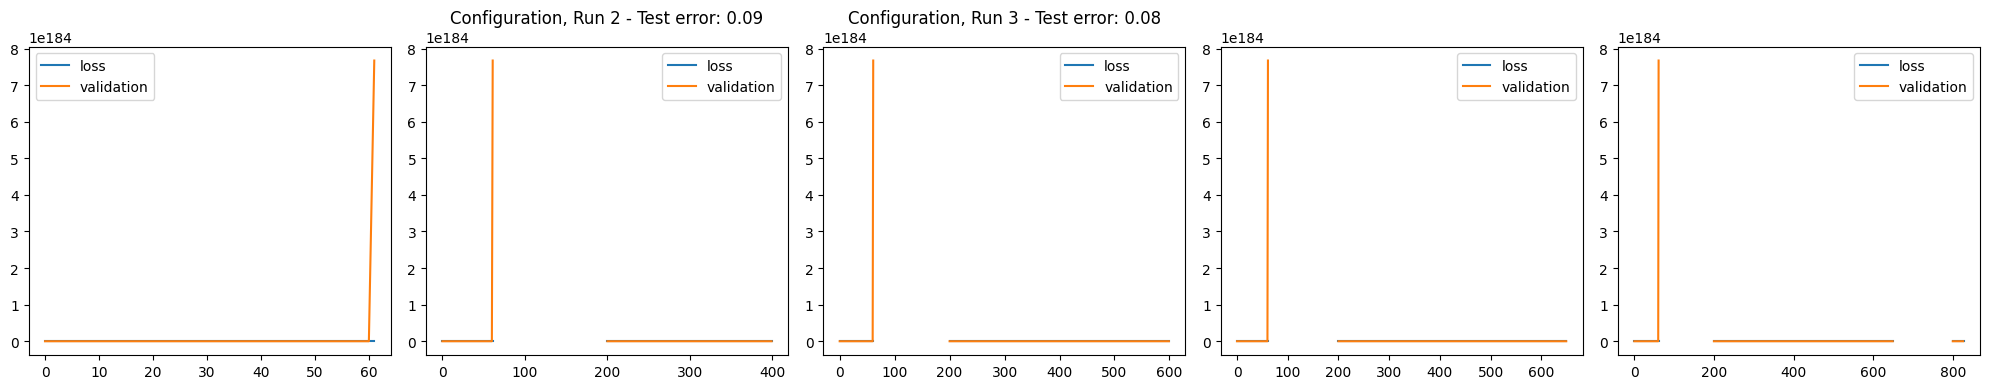

Epoch: 0 Train MSE: 0.5055279741106288 Valid MSE: 0.24193079929808603
Epoch: 1 Train MSE: 0.243905578750423 Valid MSE: 0.23437604616315144
Epoch: 2 Train MSE: 0.24257582583804008 Valid MSE: 0.23375684110155934
Epoch: 3 Train MSE: 0.24219243329153947 Valid MSE: 0.2333145131462471
Epoch: 4 Train MSE: 0.24181362855259933 Valid MSE: 0.2328807703827188
Epoch: 5 Train MSE: 0.24143625207097408 Valid MSE: 0.2324477444189161
Epoch: 6 Train MSE: 0.24105861126591185 Valid MSE: 0.232013335090439
Epoch: 7 Train MSE: 0.24067902757079102 Valid MSE: 0.23157565125498397
Epoch: 8 Train MSE: 0.2402958137076496 Valid MSE: 0.2311327885156567
Epoch: 9 Train MSE: 0.23990725627787235 Valid MSE: 0.2306828025290791
Epoch: 10 Train MSE: 0.2395115982361092 Valid MSE: 0.23022368905076795
Epoch: 11 Train MSE: 0.23910702080029453 Valid MSE: 0.22975336342443048
Epoch: 12 Train MSE: 0.23869162446357786 Valid MSE: 0.22926963889008234
Epoch: 13 Train MSE: 0.23826340876040358 Valid MSE: 0.2287702033079242
Epoch: 14 Train

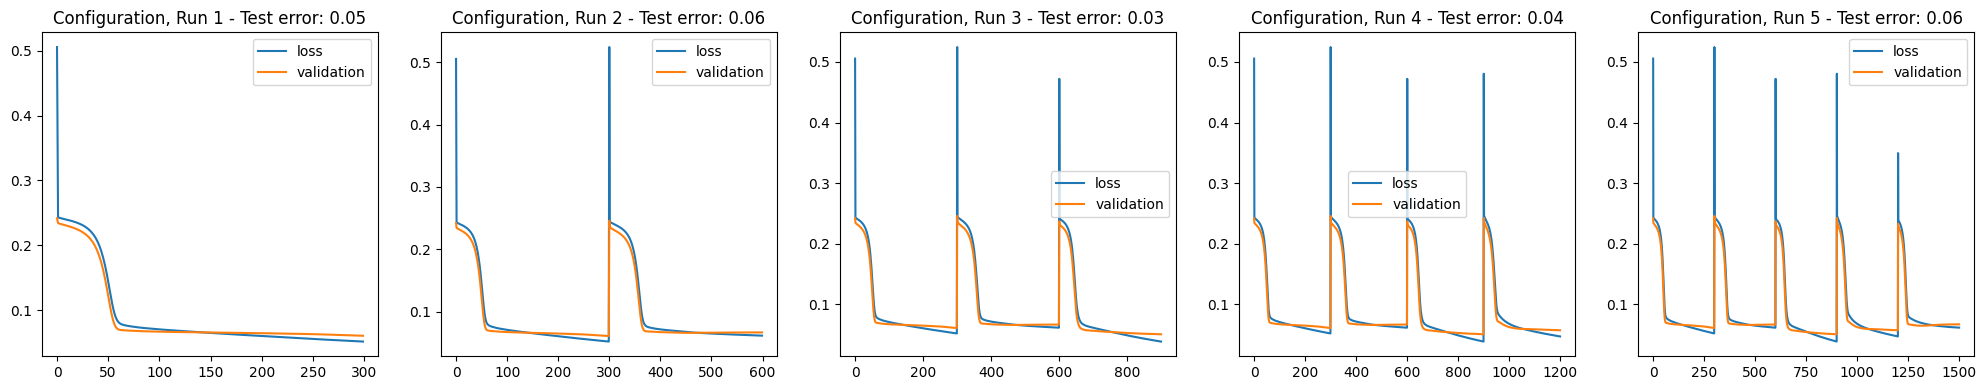

In [186]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
configurations_list = [
    # Configuration 9
    {"layers": [X_train.shape[1], 64, 32, 1], "epochs": 200, "learning_rate": 0.001, "batch_size": 32, "validation_split": 0.2},
    # Configuration 10
    {"layers": [X_train.shape[1],32, 16, 8, 1], "epochs": 300, "learning_rate": 0.001, "batch_size": 64, "validation_split": 0.3}
]
# Run the model multiple times with each configuration
i1=2
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        if np.isnan(y_pred).any():
            print("NaN values found in predictions. Skipping this run.")
            continue
        valid_indices = ~np.isnan(y_test).flatten()
        y_test_valid = y_test[valid_indices]
        y_pred_valid = y_pred[valid_indices]

    # Calculate test error

        test_error = mean_squared_error(y_test_valid, y_pred_valid)
        plt.title(f"Configuration, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()
